# <a id='0'>Table de matières</a>

- <a href='#1'>1. Introduction</a>    
    - <a href='#11'>Problématique</a> 
    - <a href='#12'>Objectif</a>
    - <a href='#12'>Description du dataset</a>
    - <a href='#12'>Etapes à suivre</a> 
    
- <a href='#2'>2. Chargement de la base de données</a>  
    - <a href='#11'>Chargement des packages</a> 
    - <a href='#12'>Lecture du dataset</a>
    
- <a href='#3'>3. Compréhension du data set : exploration de l'ensemble des variables</a> 
- <a href='#4'>4.  Nettoyage, traitement et préparation des données </a>    
- <a href='#7'>5. Modelisation   
    - <a href='#51'>Modèle de regression linéaire</a>  
    - <a href='#52'>Modèle de regression Ridge et Lasso </a>  
    - <a href='#53'>Evaluation et comparaison des modèles</a> 

- <a href='#6'>6. Conclusion</a>

# <a id="1">I. Introduction</a>

## Problèmatique 

## Objectif 

## Description du dataset 

- `Aroma`  : Intensité et qualité de l’odeur/arôme du café.
- `Flavor` : Saveur globale perçue en bouche.
- `Aftertaste` :: Saveur persistante après avoir avalé.
- `Acidity` : L’acidité perçue (vivacité, fraîcheur). Une bonne acidité est positive, trop forte peut être négative.
- `Body` : Texture en bouche (léger vs. lourd).
- `Balance` : Harmonie entre les différentes caractéristiques.
- `Uniformity` : Régularité entre différentes tasses de la même préparation.
- `Clean.Cup`  : Pureté en tasse (absence de défauts).
- `Sweetness` : Présence de notes sucrées naturelles.
- `Cupper.Points` : Score donné par l’expert dégustateur (cupper).
- `Total.Cup.Points ` : Score total qui détermine la qualité finale (souvent sur 100).


# <a id= "2"> II. Chargement de la base de données</a>

## 1) Chargement des packages

In [1]:
# Importation des bibliothèques necessaires
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import mean_absolute_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## 2) Lecture du dataset

In [2]:
data = pd.read_csv("arabica_data_cleaned.csv")

# <a id= "3"> III. Description des données (exploration du dataset)</a>

In [3]:

print(data.head())

   Unnamed: 0  Species                     Owner Country.of.Origin  \
0           1  Arabica                 metad plc          Ethiopia   
1           2  Arabica                 metad plc          Ethiopia   
2           3  Arabica  grounds for health admin         Guatemala   
3           4  Arabica       yidnekachew dabessa          Ethiopia   
4           5  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude  ...  Color  \
0      metad agricultural d

In [4]:
# Information sur les colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [5]:
# Affichage des colonnes 

pd.set_option('display.max_columns', None)
print(data.columns)

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


In [6]:
# Sélection des variables nécessaires 

colonnes = [
    "Country.of.Origin", "Variety", "Processing.Method",
    "Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance",
    "Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points",
    "Moisture", "altitude_low_meters", "altitude_high_meters", "altitude_mean_meters",
    "Total.Cup.Points"]

new_data = data[colonnes]
# Supprimer toutes les lignes où Cupper.Points == 0
new_data = new_data[new_data["Cupper.Points"] != 0]

In [7]:
new_data.describe()

Aroma       Flavor   Aftertaste      Acidity         Body  \
count  1310.000000  1310.000000  1310.000000  1310.000000  1310.000000   
mean      7.569580     7.523809     7.403344     7.538863     7.523466   
std       0.315845     0.341897     0.349867     0.319912     0.293129   
min       5.080000     6.080000     6.170000     5.250000     5.250000   
25%       7.420000     7.330000     7.250000     7.330000     7.330000   
50%       7.580000     7.580000     7.420000     7.500000     7.500000   
75%       7.750000     7.750000     7.580000     7.750000     7.670000   
max       8.750000     8.830000     8.670000     8.750000     8.580000   

           Balance   Uniformity    Clean.Cup    Sweetness  Cupper.Points  \
count  1310.000000  1310.000000  1310.000000  1310.000000    1310.000000   
mean      7.523244     9.840901     9.840626     9.910832       7.503588   
std       0.349304     0.489058     0.722158     0.454991       0.427138   
min       6.080000     6.000000     0.000000     1.330000       5.170000   
25%       7.330000    10.000000    10.000000    10.000000       7.250000   
50%       7.500000    10.000000    10.000000    10.000000       7.500000   
75%       7.750000    10.000000    10.000000    10.000000       7.750000   
max       8.750000    10.000000    10.000000    10.000000      10.000000   

          Moisture  altitude_low_meters  altitude_high_meters  \
count  1310.000000          1083.000000           1083.000000   
mean      0.088840          1759.880948           1809.221313   
std       0.047967          8771.891186           8771.229129   
min       0.000000             1.000000              1.000000   
25%       0.090000          1100.000000           1100.000000   
50%       0.110000          1310.640000           1350.000000   
75%       0.120000          1600.000000           1650.000000   
max       0.280000        190164.000000         190164.000000   

       altitude_mean_meters  Total.Cup.Points  
count           1083.000000       1310.000000  
mean            1784.551131         82.178611  
std             8771.059495          2.686039  
min                1.000000         59.830000  
25%             1100.000000         81.170000  
50%             1310.640000         82.500000  
75%             1600.000000         83.670000  
max           190164.000000         90.580000

In [8]:

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1310 entries, 0 to 1309
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1309 non-null   object 
 1   Variety               1109 non-null   object 
 2   Processing.Method     1159 non-null   object 
 3   Aroma                 1310 non-null   float64
 4   Flavor                1310 non-null   float64
 5   Aftertaste            1310 non-null   float64
 6   Acidity               1310 non-null   float64
 7   Body                  1310 non-null   float64
 8   Balance               1310 non-null   float64
 9   Uniformity            1310 non-null   float64
 10  Clean.Cup             1310 non-null   float64
 11  Sweetness             1310 non-null   float64
 12  Cupper.Points         1310 non-null   float64
 13  Moisture              1310 non-null   float64
 14  altitude_low_meters   1083 non-null   float64
 15  altitude_high_meters  1083

## 1) Vérification des doublons 

In [9]:


# Afficher les doublons 
doublons = new_data[new_data.duplicated()]
print(doublons)

# Nombre total de doublon
nb_doublons = new_data.duplicated().sum()
if nb_doublons == 0 :
    print("Le jeu de donnée ne comporte pas de doublons")
else :
    print("Nombre de doublons:", nb_doublons)

Empty DataFrame
Columns: [Country.of.Origin, Variety, Processing.Method, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean.Cup, Sweetness, Cupper.Points, Moisture, altitude_low_meters, altitude_high_meters, altitude_mean_meters, Total.Cup.Points]
Index: []
Le jeu de donnée ne comporte pas de doublons


## 2) Detection des valeurs aberrantes

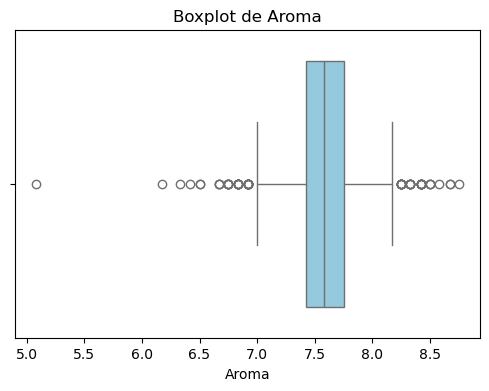

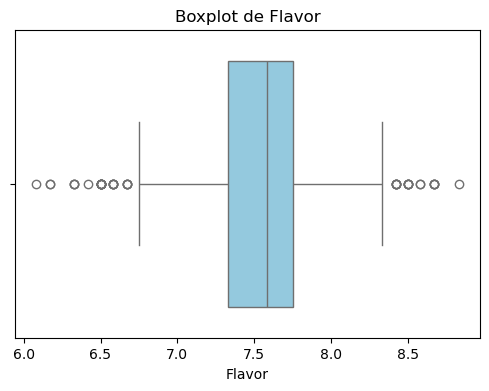

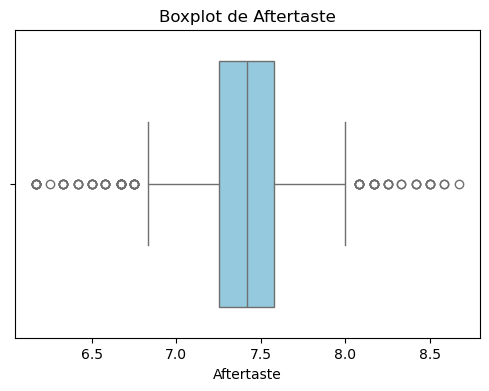

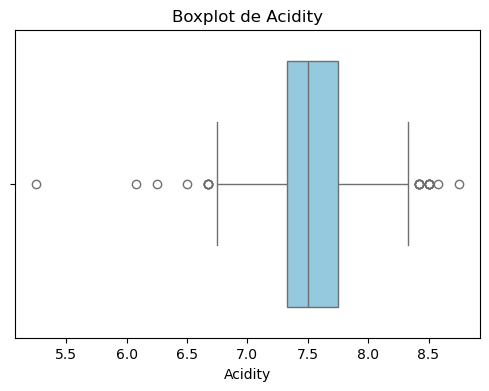

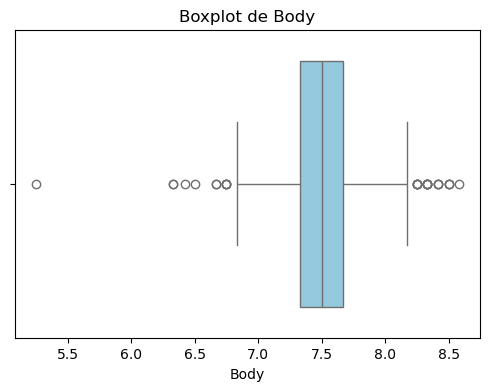

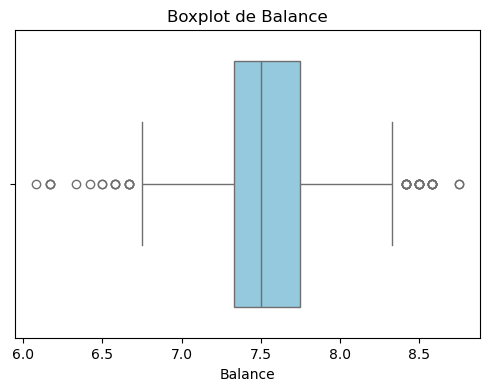

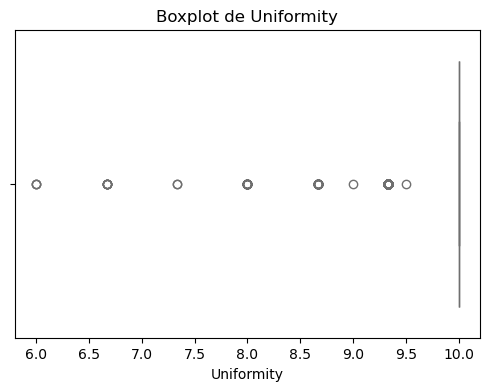

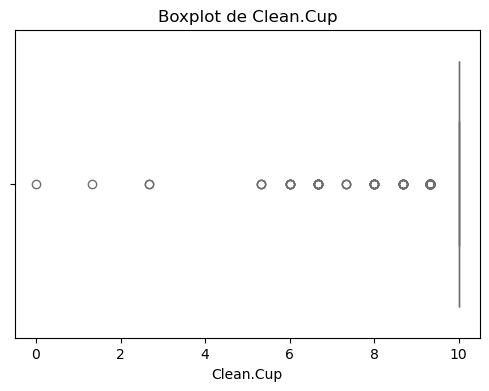

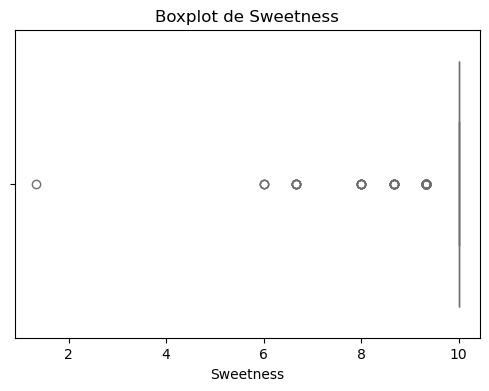

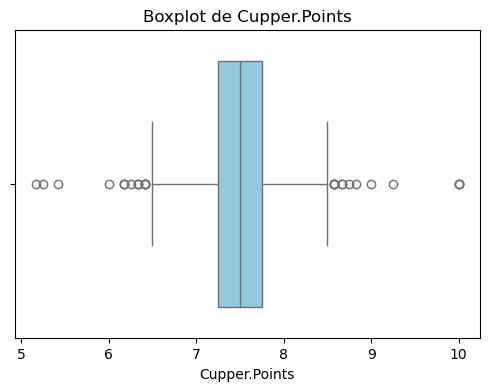

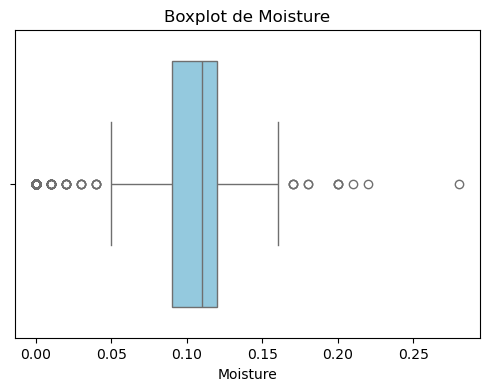

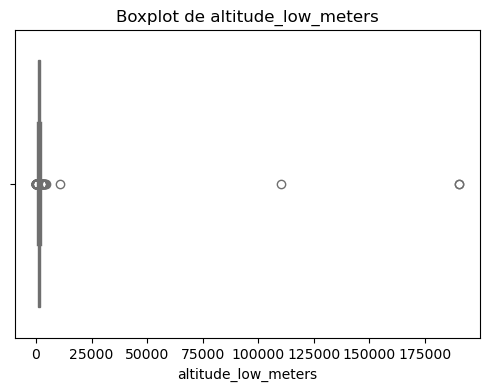

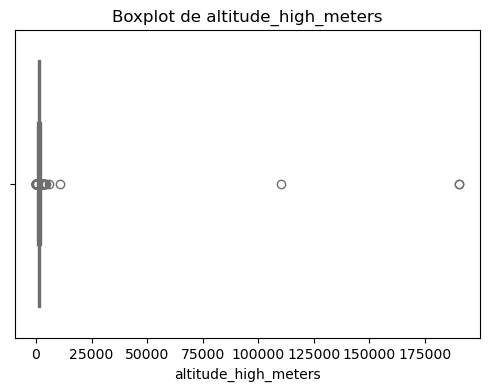

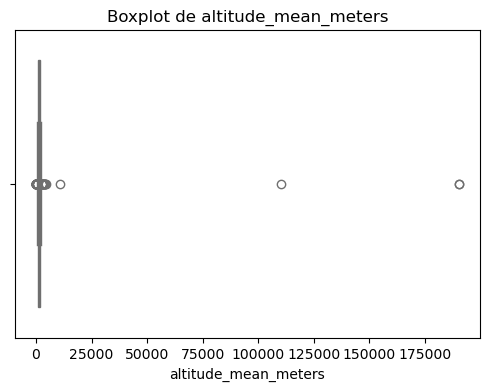

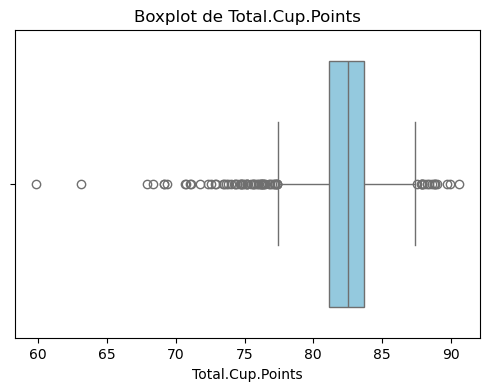

In [10]:
# Identification graphique des outliers
# stochage des noms dans une liste 
liste = new_data.select_dtypes(include=["float64", "int64"]).columns.tolist()


# Boucle sur chaque variable numérique
for feature in liste:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=new_data[feature], color="skyblue")  # plus joli
    plt.title(f"Boxplot de {feature}")
    plt.show()



Box plot pour l'identification des outliers.

Ces graphiques en boîte (boxplots) permettent d’observer la répartition des notes attribuées aux différentes caractéristiques du café, ainsi que la présence éventuelle de valeurs aberrantes.

Qualité sensorielle :
Les variables telles que aroma, flavor, aftertaste, acidity, body et balance présentent des médianes autour de 7, indiquant une bonne qualité générale. Certaines valeurs s’écartent de cette tendance centrale, avec des scores allant de 5 à 6 (cafés de qualité moyenne) jusqu’à 8 ou 9 (cafés d’excellence). Ces écarts traduisent la diversité des profils gustatifs présents dans le jeu de données.

Uniformité, douceur et propreté de tasse :
Ces variables affichent des notes proches de 10 pour la majorité des cafés, témoignant d’une qualité exceptionnelle — uniformité parfaite, douceur naturelle marquée et pureté remarquable. Toutefois, la présence de quelques valeurs très faibles (jusqu’à 0) indique des outliers, correspondant probablement à des lots défectueux ou mal notés.

Composition et environnement :
Les trois variables d’altitude (minimale, maximale et moyenne) présentent des valeurs anormalement élevées, parfois supérieures à 2500 m, ce qui dépasse l’altitude typique de culture du café (autour de 1200 m). Ces écarts pourraient traduire soit des erreurs de saisie, soit des conditions de culture très particulières.
La variable Moisture (taux d’humidité) est exprimée en pourcentage (%). La plupart des cafés se situent autour de 10 %, ce qui correspond à un taux idéal pour la conservation. Cependant, quelques valeurs extrêmes signalent des anomalies potentielles.

Enfin, le Total Cup Points (score final du café) met en évidence deux catégories : la majorité des cafés de qualité excellente et quelques cafés exceptionnellement rares ou de qualité moindre, visibles à travers les outliers.

In [11]:
# Detection des valeurs aberrantes 
# Méthode de l'intervalle interquartille (IQR)

# Séléction sur les colonnes numériques uniquement
colonnes_numeriques = new_data.select_dtypes(include=["float64", "int64"]).columns

# Détection des outliers avec IQR
outliers_iqr = {}

for col in colonnes_numeriques:
    Q1 = new_data[col].quantile(0.25)   # Premier quartile
    Q3 = new_data[col].quantile(0.75)   # Troisième quartile
    IQR = Q3 - Q1                   # Intervalle interquartile
    
    # Seuils
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Indices des outliers
    outliers =  new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)].index
    
    outliers_iqr[col] = outliers.tolist()

# Résumé
for col, out in outliers_iqr.items():
    print(f"Colonne: {col} - Nombre d'outliers: {len(out)}")

    


Colonne: Aroma - Nombre d'outliers: 69
Colonne: Flavor - Nombre d'outliers: 42
Colonne: Aftertaste - Nombre d'outliers: 84
Colonne: Acidity - Nombre d'outliers: 24
Colonne: Body - Nombre d'outliers: 29
Colonne: Balance - Nombre d'outliers: 38
Colonne: Uniformity - Nombre d'outliers: 182
Colonne: Clean.Cup - Nombre d'outliers: 116
Colonne: Sweetness - Nombre d'outliers: 92
Colonne: Cupper.Points - Nombre d'outliers: 31
Colonne: Moisture - Nombre d'outliers: 293
Colonne: altitude_low_meters - Nombre d'outliers: 61
Colonne: altitude_high_meters - Nombre d'outliers: 57
Colonne: altitude_mean_meters - Nombre d'outliers: 61
Colonne: Total.Cup.Points - Nombre d'outliers: 73


In [12]:
# Méthode z-score modifié

def modified_z_score(series):
    """
    Calcule le Modified Z-score pour une série numérique.
    Retourne un DataFrame avec les valeurs et un indicateur outlier.
    """
    series = series.dropna()  # enlever les valeurs manquantes
    median = np.median(series)
    mad = np.median(np.abs(series - median))  # Median Absolute Deviation
    
    if mad == 0:  # éviter division par zéro
        return pd.DataFrame({"valeur": series, "MZ_score": np.nan, "outlier": False})
    
    mz_score = 0.6745 * (series - median) / mad
    outliers = np.abs(mz_score) > 3.5
    
    return pd.DataFrame({
        "valeur": series,
        "MZ_score": mz_score,
        "outlier": outliers
    })

# Exemple sur une variable Aroma
"""result = modified_z_score(new_data["Acidity"])
print(result.head())"""

for col in colonnes_numeriques : 
    result = modified_z_score(new_data[col])
    # Nombre d'outliers détectés
    print(f"Nombre d'outliers {col}  :", result["outlier"].sum())


Nombre d'outliers Aroma  : 16
Nombre d'outliers Flavor  : 37
Nombre d'outliers Aftertaste  : 37
Nombre d'outliers Acidity  : 19
Nombre d'outliers Body  : 12
Nombre d'outliers Balance  : 34
Nombre d'outliers Uniformity  : 0
Nombre d'outliers Clean.Cup  : 0
Nombre d'outliers Sweetness  : 0
Nombre d'outliers Cupper.Points  : 14
Nombre d'outliers Moisture  : 301
Nombre d'outliers altitude_low_meters  : 35
Nombre d'outliers altitude_high_meters  : 32
Nombre d'outliers altitude_mean_meters  : 34
Nombre d'outliers Total.Cup.Points  : 43


## 3) Détection des valeurs manquantes

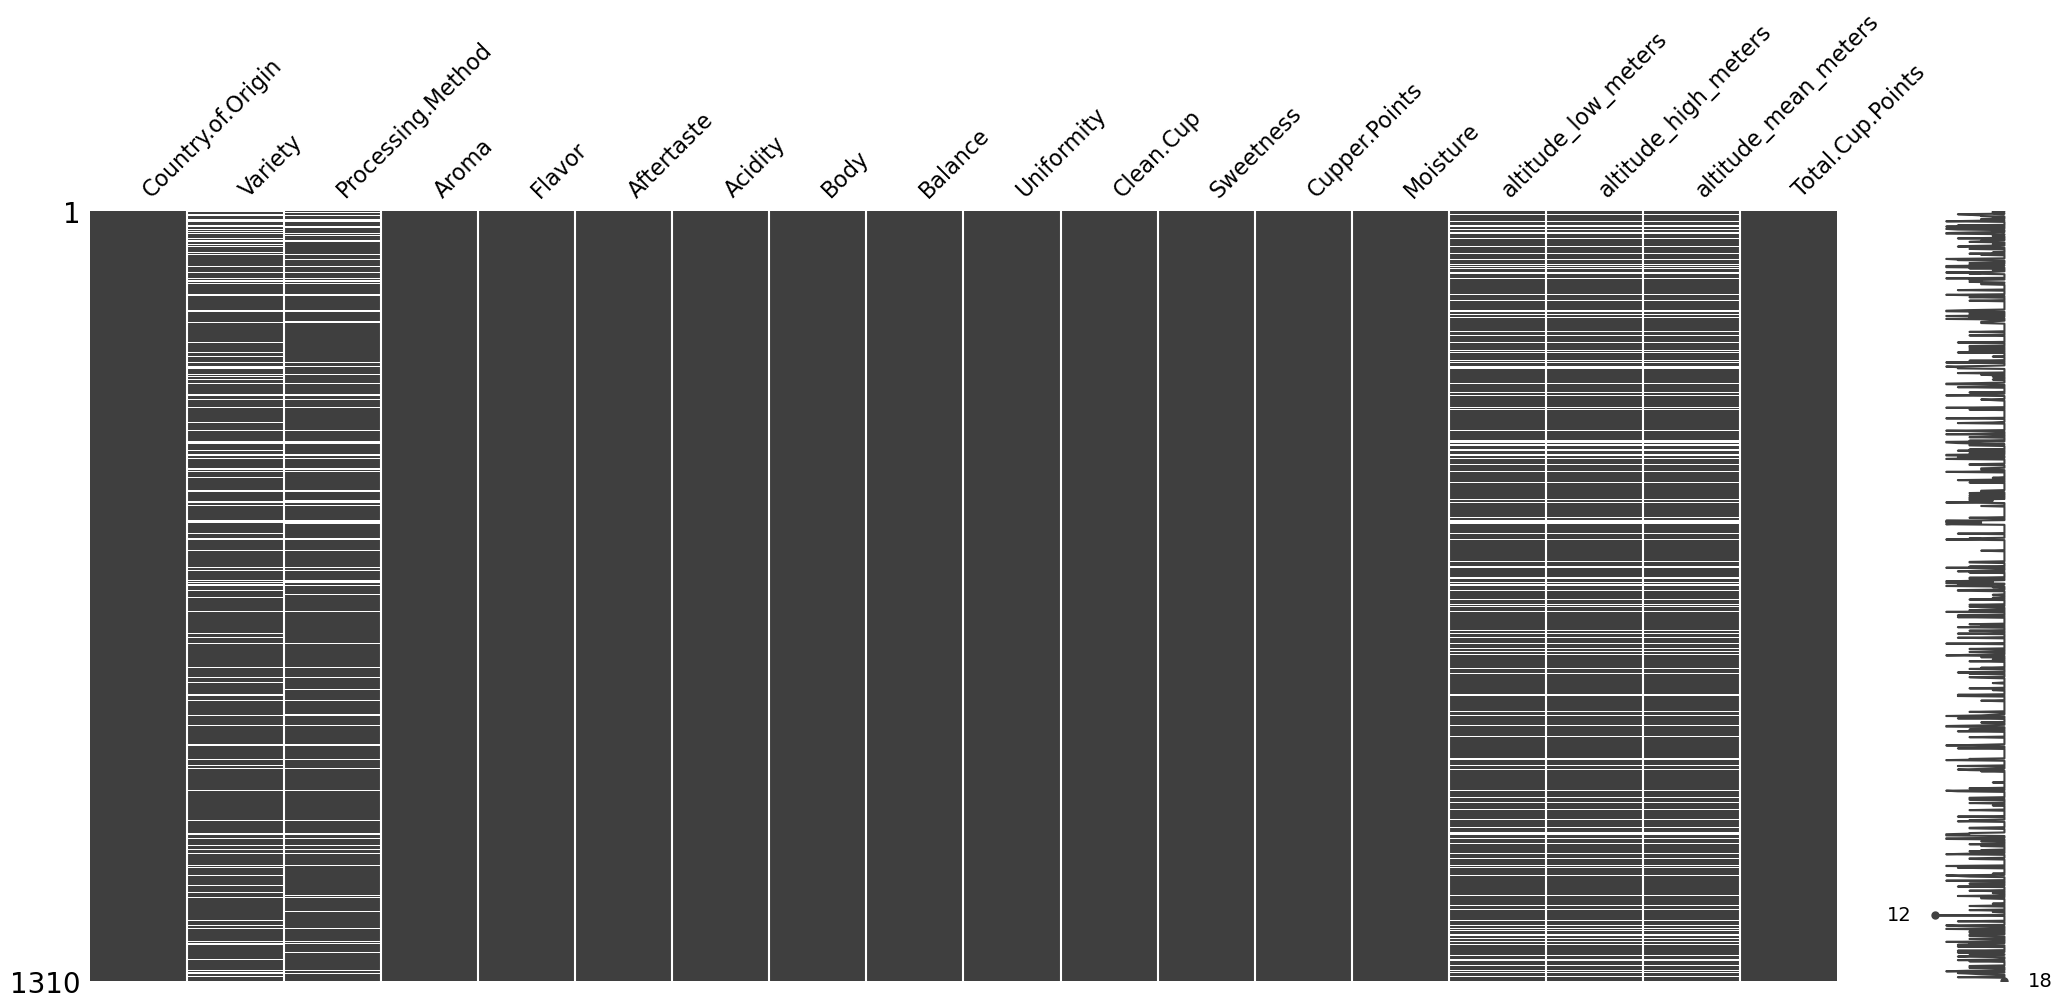

In [13]:
# visualiser les valeurs manquantes avec missigno 
msno.matrix(new_data)
plt.show()

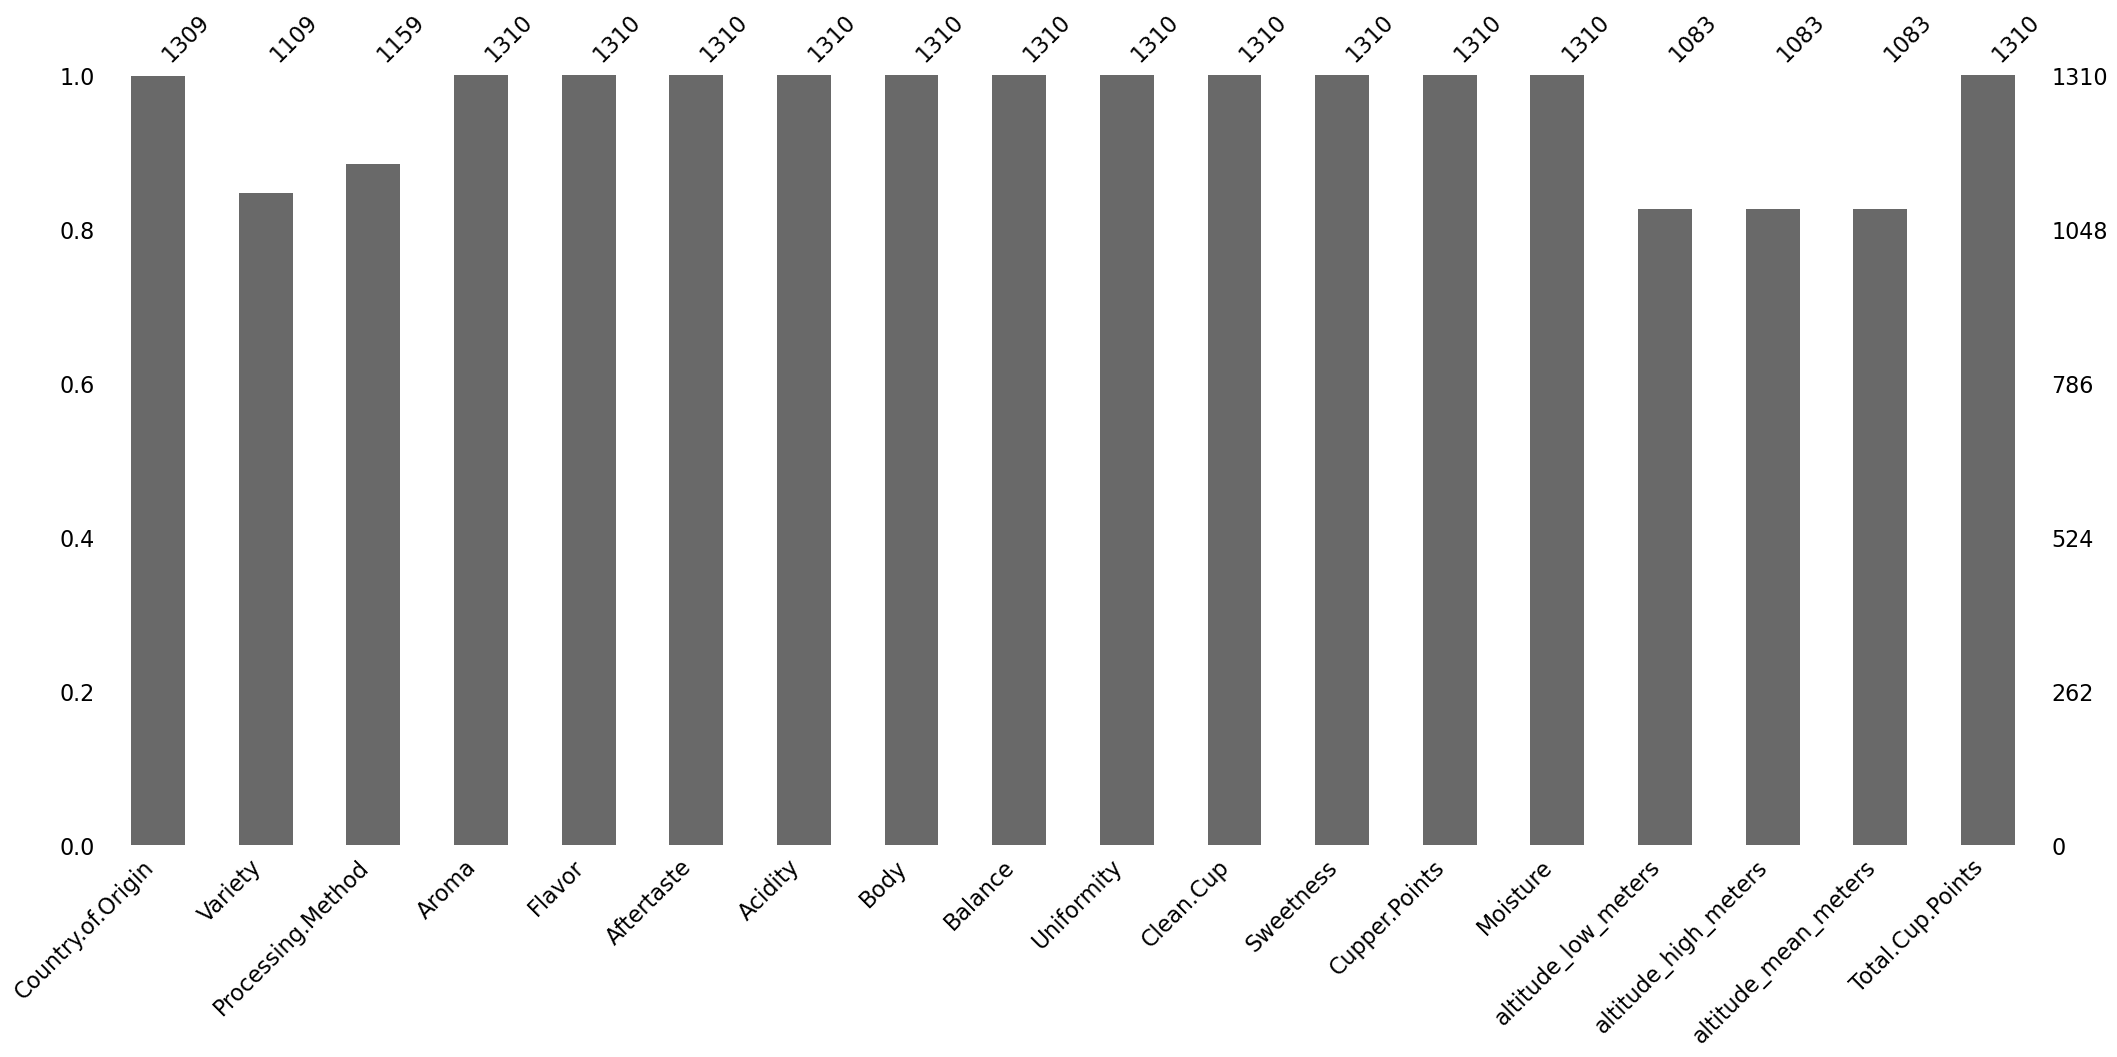

In [14]:
msno.bar(new_data)
plt.show()

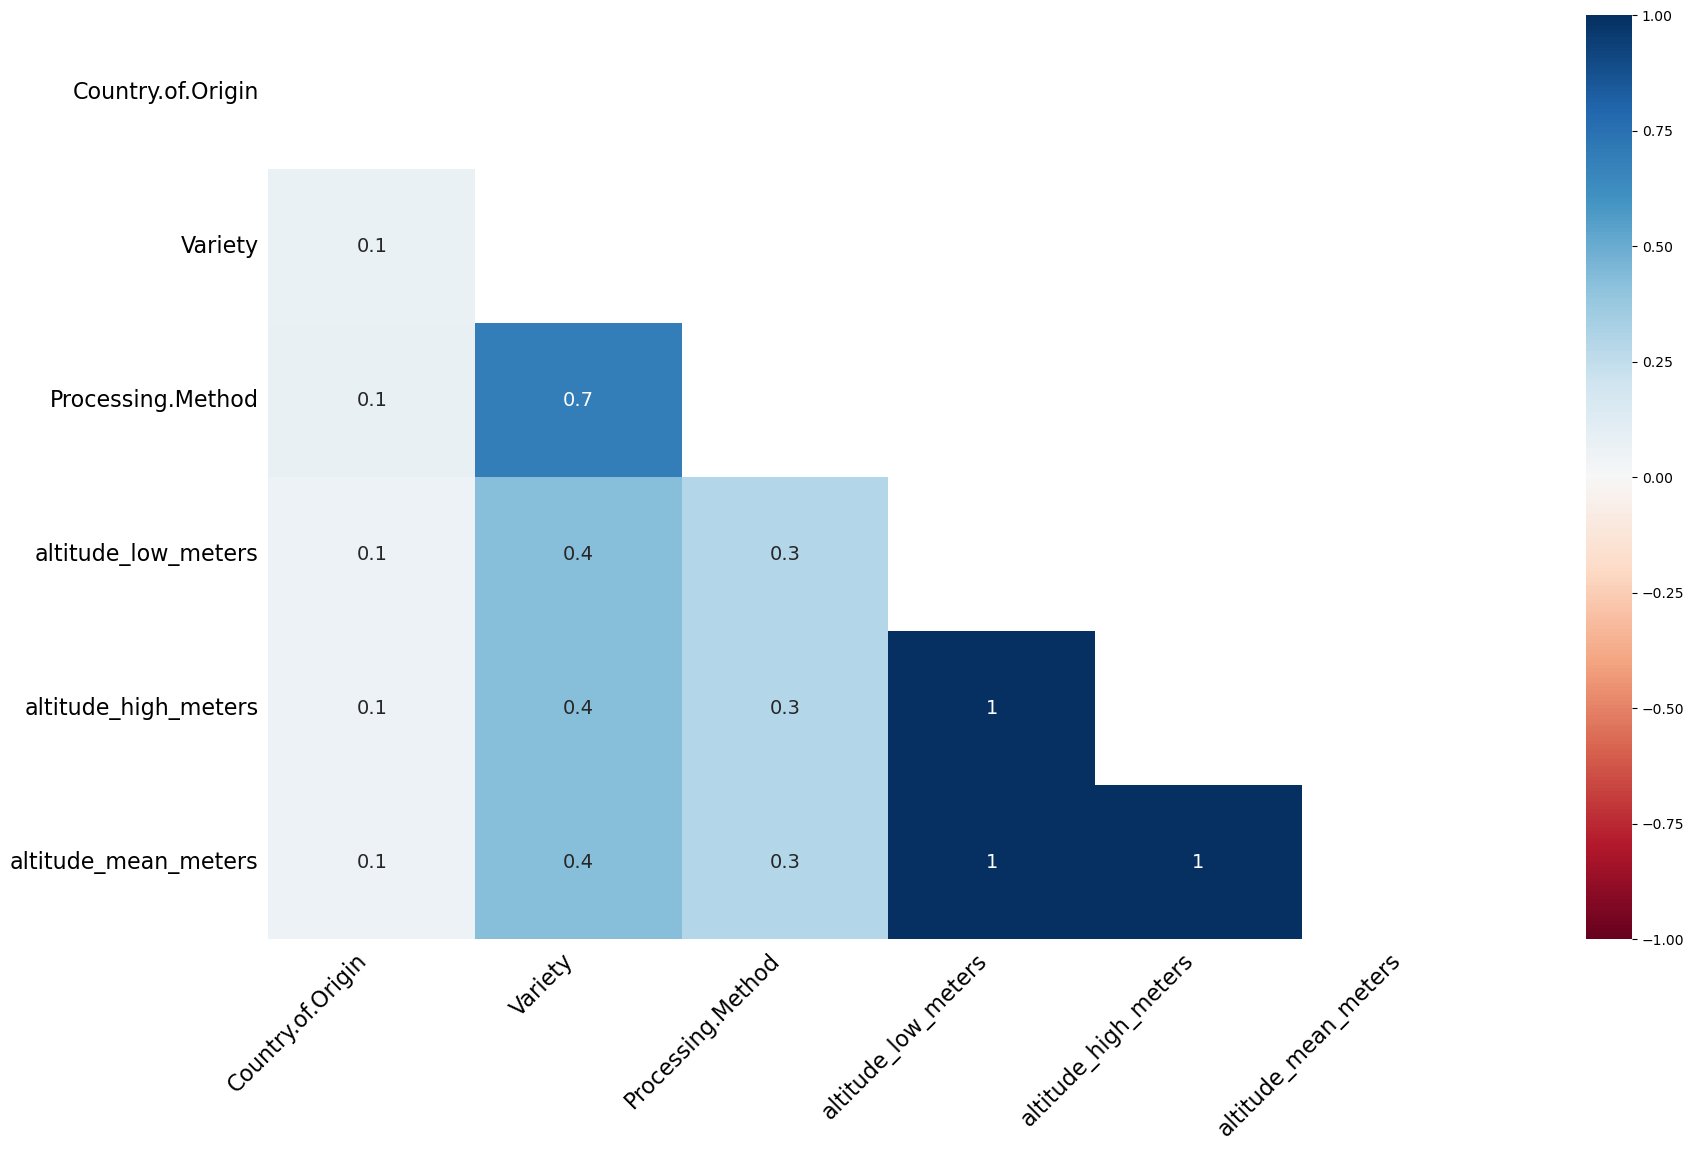

In [15]:
# Pour connaître la correlation qui existe entre les variables qui ont des données manquantes 
# pour pouvoir déterminer leur nature 
msno.heatmap(new_data)
plt.show()


In [16]:
#  vérification des valeurs manquantes 
missing_values = new_data.isnull().sum()
missing_percent = (missing_values/len(new_data)) * 100
missing_table = pd.DataFrame({'Missing values': missing_values, 'Pourcentage' : missing_percent})
print(missing_table)


                      Missing values  Pourcentage
Country.of.Origin                  1     0.076336
Variety                          201    15.343511
Processing.Method                151    11.526718
Aroma                              0     0.000000
Flavor                             0     0.000000
Aftertaste                         0     0.000000
Acidity                            0     0.000000
Body                               0     0.000000
Balance                            0     0.000000
Uniformity                         0     0.000000
Clean.Cup                          0     0.000000
Sweetness                          0     0.000000
Cupper.Points                      0     0.000000
Moisture                           0     0.000000
altitude_low_meters              227    17.328244
altitude_high_meters             227    17.328244
altitude_mean_meters             227    17.328244
Total.Cup.Points                   0     0.000000


## 4) Analyse Univarié

In [17]:
cat_vars = new_data.select_dtypes(include=['object', 'category'])

# Comptage des modalités
for col in cat_vars.columns:
    n_modalites = new_data[col].nunique()
    print(f"{col} : {n_modalites} modalités")

Country.of.Origin : 36 modalités
Variety : 29 modalités
Processing.Method : 5 modalités


In [18]:
# Tableau des effectifs 
cat_vars = new_data.select_dtypes(include=['object']).columns
for col in cat_vars:
    print(f"\nAnalyse de la variable : {col}")
    freq = new_data[col].value_counts()
    percent = new_data[col].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Fréquence': freq, 'Pourcentage (%)': percent.round(2)})
    print(result)


Analyse de la variable : Country.of.Origin
                              Fréquence  Pourcentage (%)
Country.of.Origin                                       
Mexico                              236            18.03
Colombia                            183            13.98
Guatemala                           181            13.83
Brazil                              132            10.08
Taiwan                               75             5.73
United States (Hawaii)               73             5.58
Honduras                             52             3.97
Costa Rica                           51             3.90
Ethiopia                             44             3.36
Tanzania, United Republic Of         40             3.06
Thailand                             32             2.44
Uganda                               26             1.99
Nicaragua                            26             1.99
Kenya                                25             1.91
El Salvador                          21     

C:\Users\DELL\AppData\Local\Temp\ipykernel_11140\1892100880.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


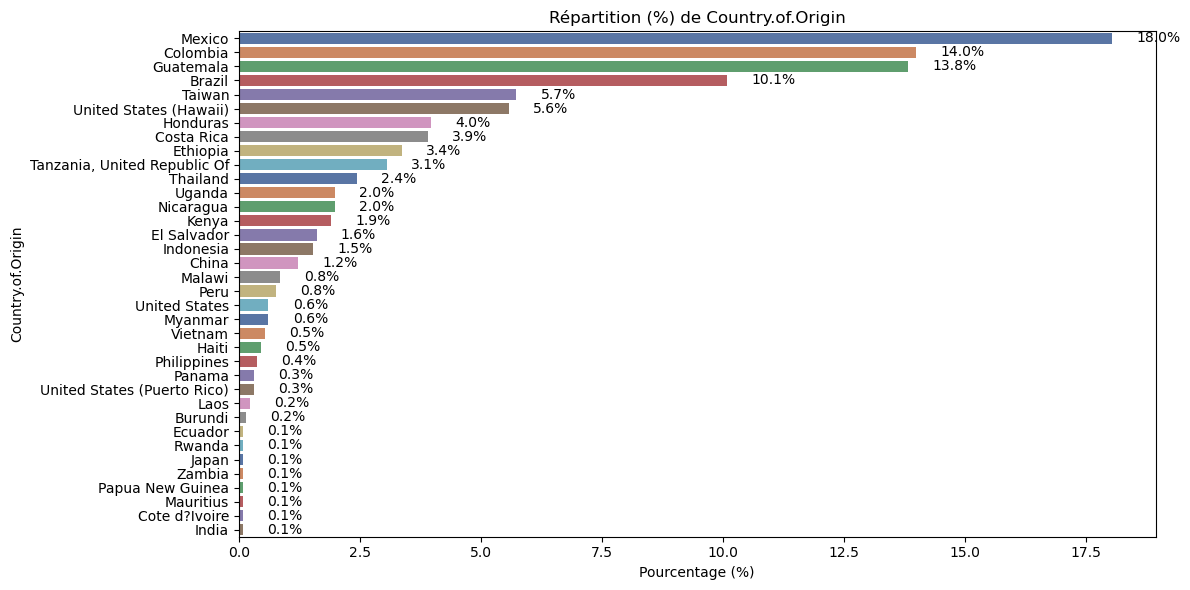

C:\Users\DELL\AppData\Local\Temp\ipykernel_11140\1892100880.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


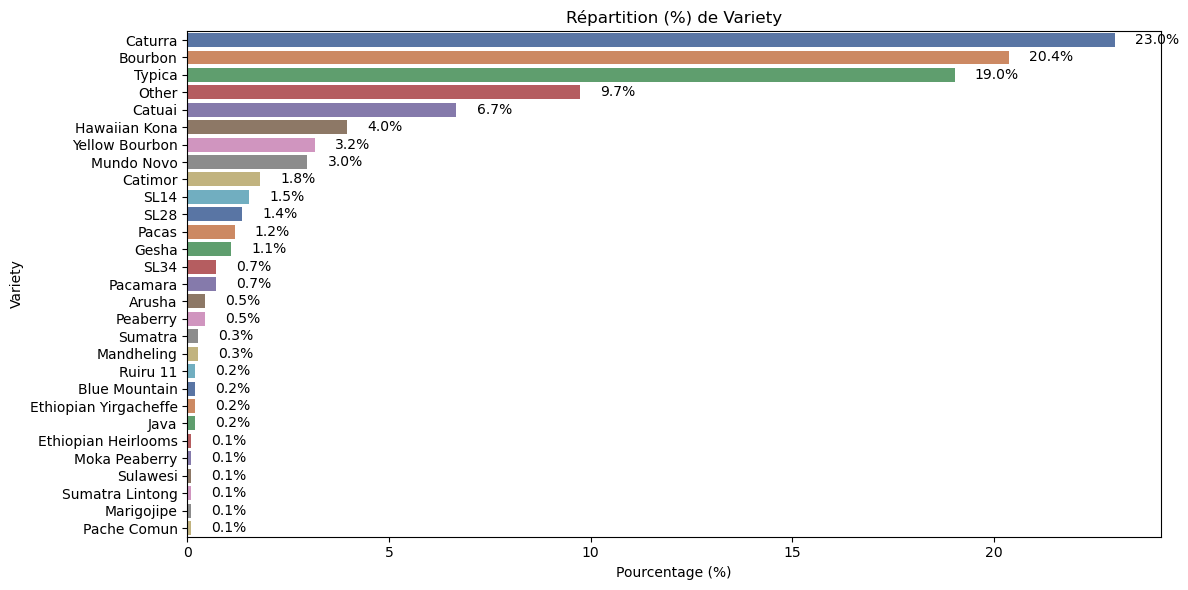

C:\Users\DELL\AppData\Local\Temp\ipykernel_11140\1892100880.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


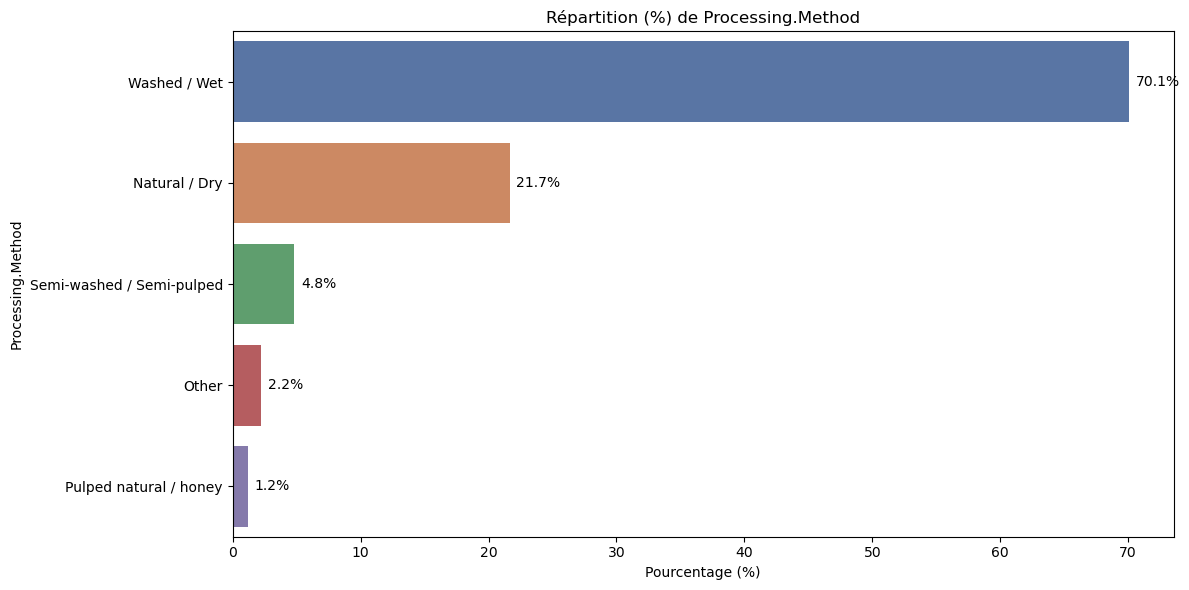

In [19]:
# Graphique en barre pour les variables catégorielles


# Liste des variables catégorielles
listes = new_data.select_dtypes(include=["object"]).columns.tolist()

# Boucle sur chaque variable catégorielle
for feature in listes:
    plt.figure(figsize=(12, 6))
    
    # Calcul des pourcentages
    pourcentages = (new_data[feature].value_counts(normalize=True) * 100).reset_index()
    pourcentages.columns = [feature, 'Pourcentage']
    
    # Tracé du graphique en barres horizontales
    sns.barplot(
        data=pourcentages,
        y=feature,
        x='Pourcentage',
        palette='deep'
    )
    
    # Ajout des étiquettes et titre
    plt.title(f"Répartition (%) de {feature}")
    plt.xlabel("Pourcentage (%)")
    plt.ylabel(feature)
    
    # Afficher les pourcentages sur les barres
    for index, value in enumerate(pourcentages['Pourcentage']):
        plt.text(value + 0.5, index, f"{value:.1f}%", va='center')
    
    plt.tight_layout()
    plt.show()


Interprétation des graphiques 

Graphique 1 : Repartition des pays originaire des cafés
Ce graphique illustre la provenance géographique des cafés présents dans le jeu de données.
Parmi les 35 pays représentés, seuls quatre se distinguent par une forte représentation :
- Le Mexique arrive en tête avec 18 % des échantillons,
- suivi de la Colombie et du Guatemala avec 14 % chacun,
- puis du Brésil avec 10 %.

Les autres pays ont une représentation beaucoup plus faible, variant entre 0,6 % et 5 %.
Ces résultats montrent clairement que l’Amérique — notamment centrale et du Sud — domine la production de café dans cet échantillon.

Graphique 2 : Repartition des variétés des cafés
Ce graphique montre la repartition des différents variétés des cafés. 
Parmi 29 variétés présents, c'est seulement trois qui ont une forte représentation:
- Caturra est le premier de la liste avec  23 % 
- Suivi de Bourbon  avec un pourcentage 20.4%
- et enfin Typica  qui présente 19.03 % de l'échantillon

Les autres variétes ont une faible représentation qui varient entre 0.1 et 8.2%. Ces résultats montrent que le café le plus produit et probabelement le plus bu est le Caturra. 

Graphique 3 : Repartition de la méthode de traitement des cafés

Ce graphique donne les différents méthodes de traitement des cafés. La méthode de traitement la plus utilisée est le lavage qui représente 70% suivi de la méthode naturelle qui repésente 19.2%. Les autres méthodes ne sont représentés que faiblement. Ces résultats signifient que la majorité des cafés ont été soigneusement lavé. Par conséquent ils sont plus brillants et plus acides, avec des arômes plus fruités, floraux et une propriétés en tasse élevées et reflète probabelement une bonne qualité.



In [20]:
# Statistique descriptive
new_data.describe()


Aroma       Flavor   Aftertaste      Acidity         Body  \
count  1310.000000  1310.000000  1310.000000  1310.000000  1310.000000   
mean      7.569580     7.523809     7.403344     7.538863     7.523466   
std       0.315845     0.341897     0.349867     0.319912     0.293129   
min       5.080000     6.080000     6.170000     5.250000     5.250000   
25%       7.420000     7.330000     7.250000     7.330000     7.330000   
50%       7.580000     7.580000     7.420000     7.500000     7.500000   
75%       7.750000     7.750000     7.580000     7.750000     7.670000   
max       8.750000     8.830000     8.670000     8.750000     8.580000   

           Balance   Uniformity    Clean.Cup    Sweetness  Cupper.Points  \
count  1310.000000  1310.000000  1310.000000  1310.000000    1310.000000   
mean      7.523244     9.840901     9.840626     9.910832       7.503588   
std       0.349304     0.489058     0.722158     0.454991       0.427138   
min       6.080000     6.000000     0.000000     1.330000       5.170000   
25%       7.330000    10.000000    10.000000    10.000000       7.250000   
50%       7.500000    10.000000    10.000000    10.000000       7.500000   
75%       7.750000    10.000000    10.000000    10.000000       7.750000   
max       8.750000    10.000000    10.000000    10.000000      10.000000   

          Moisture  altitude_low_meters  altitude_high_meters  \
count  1310.000000          1083.000000           1083.000000   
mean      0.088840          1759.880948           1809.221313   
std       0.047967          8771.891186           8771.229129   
min       0.000000             1.000000              1.000000   
25%       0.090000          1100.000000           1100.000000   
50%       0.110000          1310.640000           1350.000000   
75%       0.120000          1600.000000           1650.000000   
max       0.280000        190164.000000         190164.000000   

       altitude_mean_meters  Total.Cup.Points  
count           1083.000000       1310.000000  
mean            1784.551131         82.178611  
std             8771.059495          2.686039  
min                1.000000         59.830000  
25%             1100.000000         81.170000  
50%             1310.640000         82.500000  
75%             1600.000000         83.670000  
max           190164.000000         90.580000

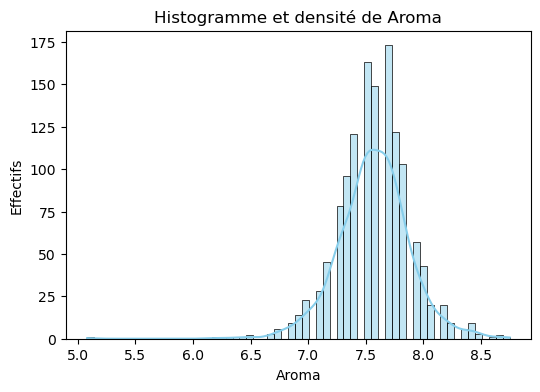

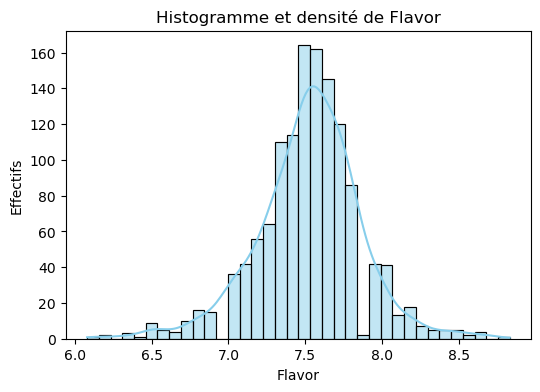

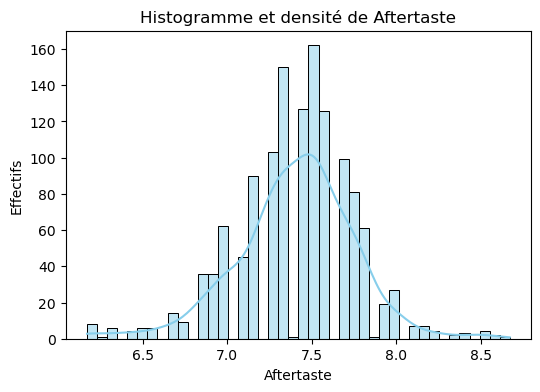

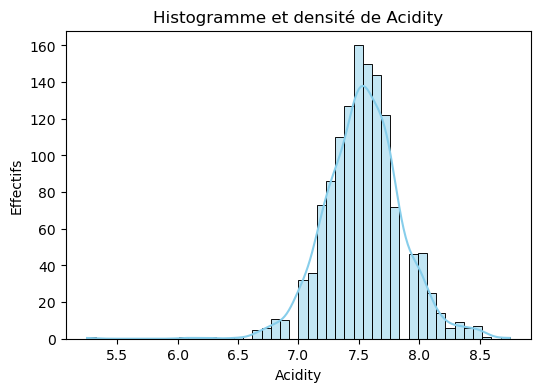

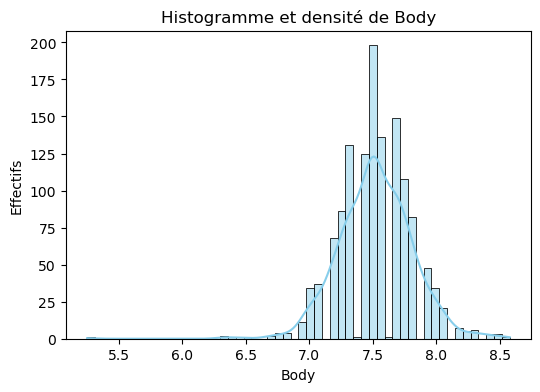

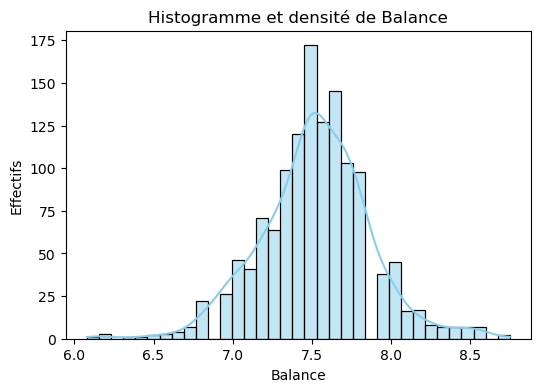

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

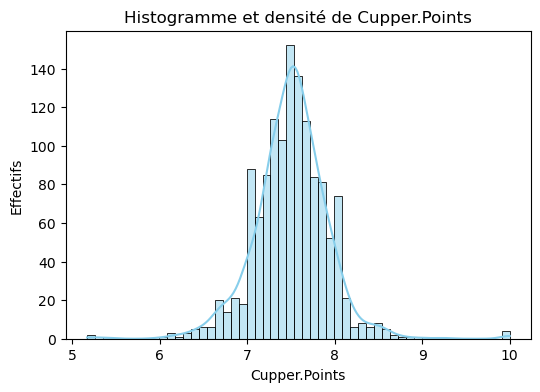

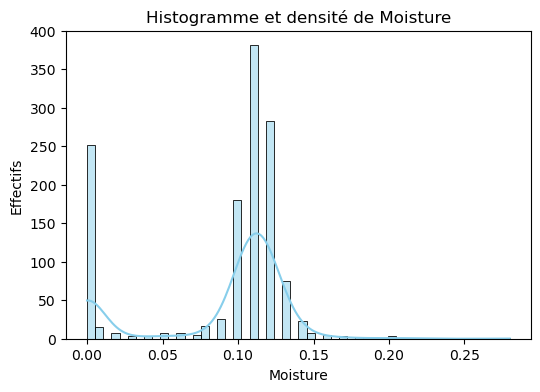

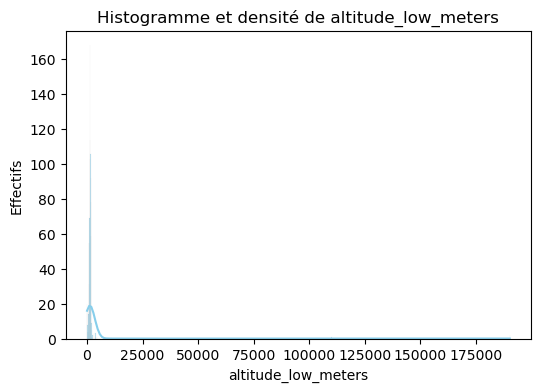

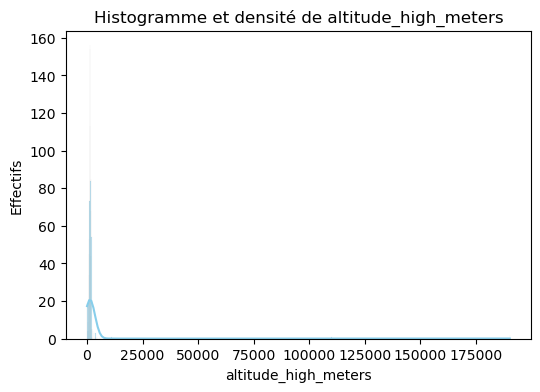

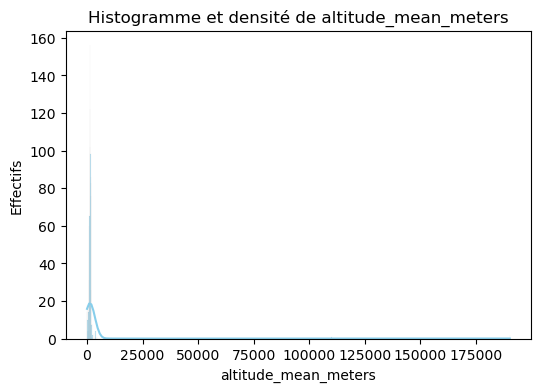

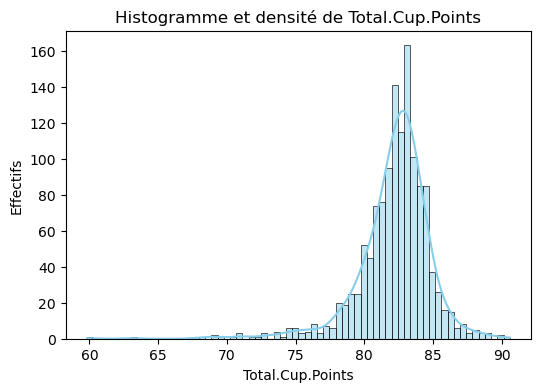

In [21]:
# Boucle pour hystogramme des variables numériques
for feature in liste:
    if feature in new_data.columns:
        plt.figure(figsize=(6,4))
         
        # determination automatique du nombre d'intervale avec la règle de friedman
        x = new_data[feature].dropna()

        # Calcul IQR
        Q1 = np.percentile(x, 25)
        Q3 = np.percentile(x, 75)
        IQR = Q3 - Q1

        n = len(x)
        # Calcul largeur de classe selon Freedman-Diaconis

        bin_width = 2 * IQR / (n ** (1/3))
            
        # Si bin_width = 0 (données constantes), on met 10 classes par défaut
        if bin_width == 0:
            bins = 10
        else:
            bins = int(np.ceil((x.max() - x.min()) / bin_width))
            sns.histplot(x, bins=bins, kde=True, color='skyblue', edgecolor='black').set_title(feature)
            plt.title(f"Histogramme et densité de {feature}")
            plt.xlabel(feature)
            plt.ylabel("Effectifs")
    plt.show()

Interprétation des histogrammes

L’ensemble de ces graphiques sont des histogrammes. Ils permettent de visualiser la distribution des valeurs, d’observer comment elles se répartissent et d’identifier les tendances générales pour chaque variable.

Graphique 1 : Intensité des arômes

Ce graphique montre la répartition de la concentration aromatique des cafés.
La majorité des cafés ont une intensité élevée, comprise entre 7 et 8, ce qui traduit une bonne qualité aromatique. Quelques cafés présentent une intensité moyenne (autour de 5–6), tandis que d’autres se distinguent par une intensité exceptionnelle (jusqu’à 10).
Cela signifie que la plupart des cafés possèdent un arôme agréable et équilibré, avec quelques rares cafés au profil exceptionnel.

Graphique 2 : Saveur globale perçue en bouche

La majorité des cafés présentent une saveur prononcée, avec des notes comprises entre 7 et 8.
Certains ont une saveur correcte mais moins marquante (autour de 6), tandis que quelques-uns atteignent une intensité maximale (10).
Ces résultats indiquent que le goût global des cafés est globalement bon et apprécié.

Graphique 3 : Arrière-goût (Aftertaste)

La répartition des notes d’arrière-goût se concentre principalement entre 7 et 8.
Cependant, on observe quelques valeurs plus faibles (inférieures à 6) ou plus élevées (supérieures à 8).Cela suggère que la plupart des cafés laissent une sensation agréable et persistante, tandis que certains se démarquent par une intensité exceptionnelle.

Graphique 4 : Acidité perçue

La majorité des cafés ont une acidité comprise entre 7 et 8, ce qui reflète une acidité vive mais équilibrée.
Quelques cafés ont une acidité faible (inférieure à 6), conférant un goût plus doux, tandis que d’autres ont une acidité forte (supérieure à 8), parfois désagréable.
Globalement, la majorité des cafés sont bien équilibrés sur ce plan.

Graphique 5 : Body (texture en bouche)

La majorité des cafés ont une texture dense et crémeuse, avec des valeurs comprises entre 7 et 8,5.
Quelques-uns présentent une texture plus légère (inférieure à 6).
Cela traduit une sensation de rondeur et de corps bien présente dans la majorité des cafés.

Graphique 6 : Balance (harmonie globale)

La plupart des cafés ont une note d’équilibre située entre 7 et 8, indiquant une bonne harmonie entre les différentes caractéristiques.
Quelques cafés présentent un équilibre plus faible (autour de 6–6,5).
Globalement, les cafés étudiés ont des profils gustatifs cohérents et bien équilibrés.

Graphique 7 : Cupper Points (note de l’expert dégustateur)

La plupart des cafés obtiennent des notes entre 7 et 8, ce qui correspond à une bonne qualité sensorielle, sans défaut majeur.
Une minorité a des notes plus faibles (5 à 6), tandis que quelques cafés atteignent des scores exceptionnels (supérieurs à 9).
Ces résultats confirment une qualité gustative élevée dans la majorité de l’échantillon.

Graphique 8 : Moisture (taux d’humidité des grains)

Les taux d’humidité sont majoritairement compris entre 10 et 13 %, reflétant une bonne conservation et un bon développement aromatique.
Certains cafés ont un taux inférieur à 9 %, ce qui peut causer une perte d’arômes, tandis que d’autres dépassent 15 %, avec un risque de moisissure.
Globalement, la majorité des cafés ont une humidité conforme aux standards de qualité.

Graphiques 9, 10 et 11 : Altitudes (minimale, maximale et moyenne)

Les valeurs observées dépassent souvent les 1200 m, alors que l’altitude normale de culture du café varie généralement entre 500 et 1200 m.
Ces valeurs semblent incohérentes ou mal renseignées et méritent une vérification ou un traitement des données.

Graphique 12 : Total Cup Points (score final global)

Les scores totaux se situent majoritairement entre 80 et 85, indiquant une qualité élevée et bien équilibrée.
Quelques cafés ont un score standard (60–80), tandis que d’autres dépassent 85, traduisant une qualité exceptionnelle.
Ces résultats confirment que le jeu de données contient majoritairement des cafés de très bonne qualité, avec quelques cafés moyens et rares cafés d’excellence.

En résumé
Ce jeu de données révèle une diversité importante dans la qualité des cafés. La majorité des échantillons sont de très bonne qualité, certains sont moyens, et d'autres se distinguent comme exceptionnels. Ces résultats traduisent la variété de terroirs, des méthodes de culture et de transformation, qui influencent directement la qualité sensorielle du café.

## 5) Analyse bivarié

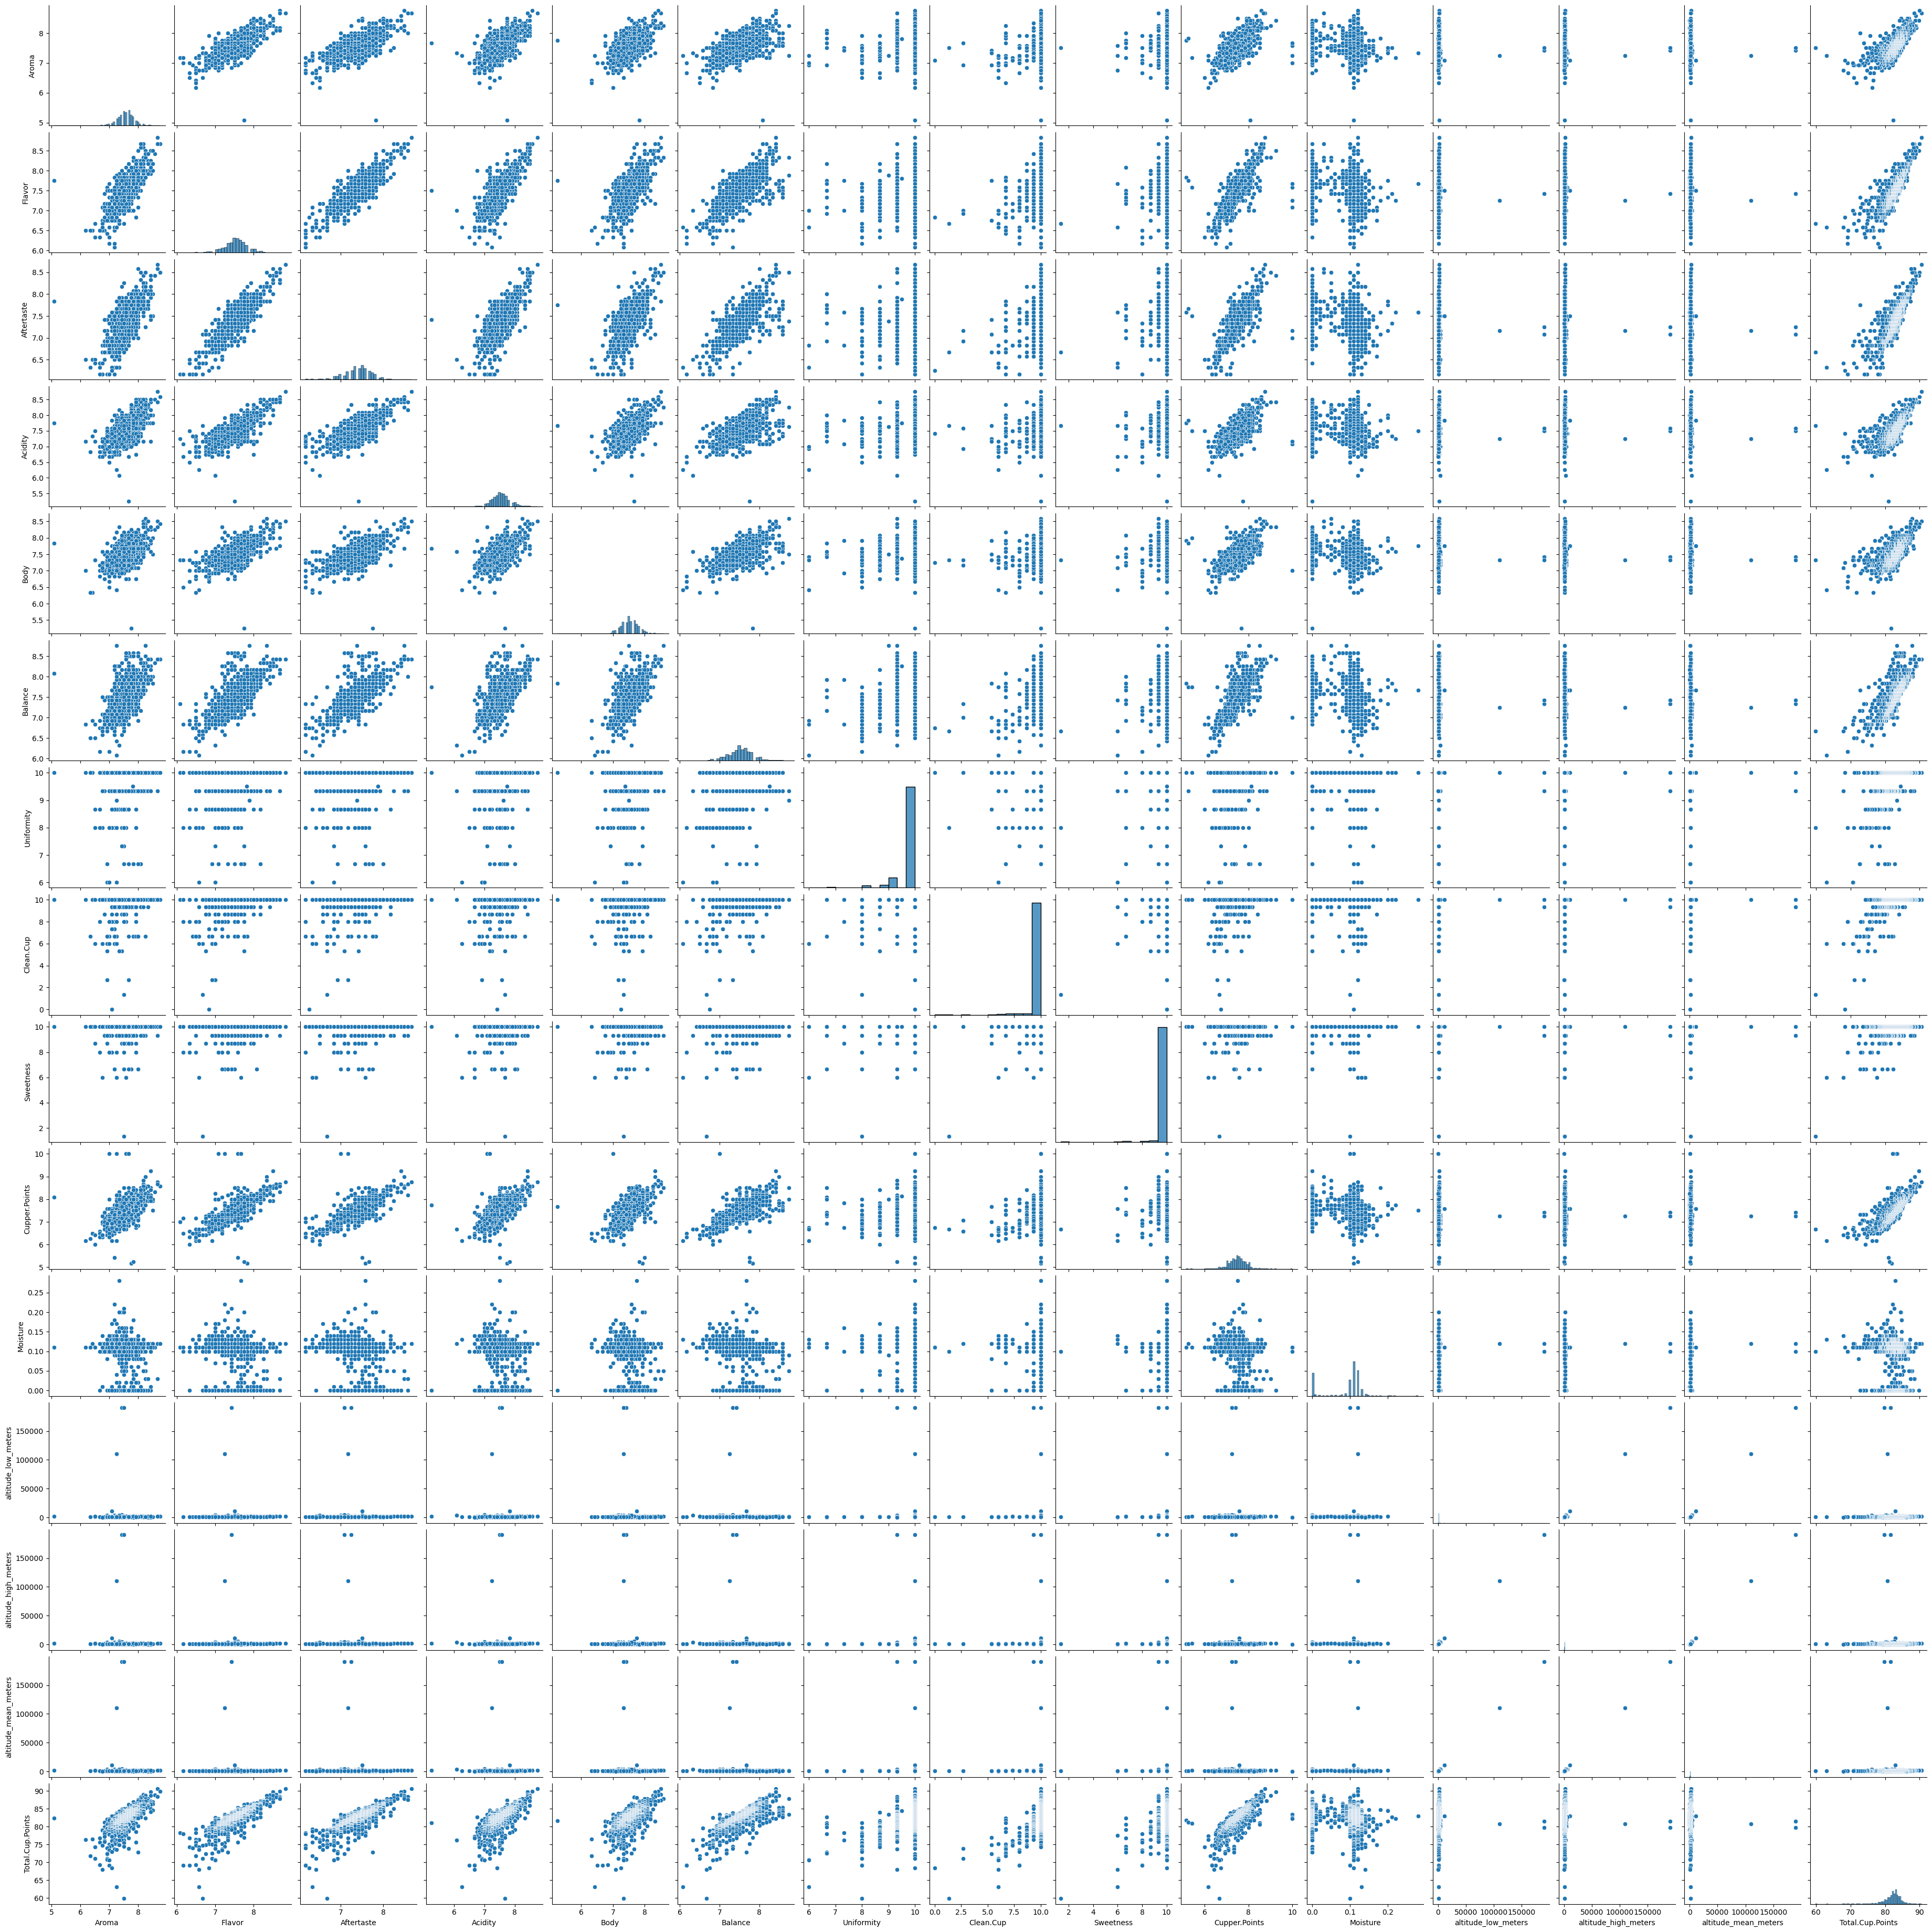

In [22]:
sns.pairplot(new_data)

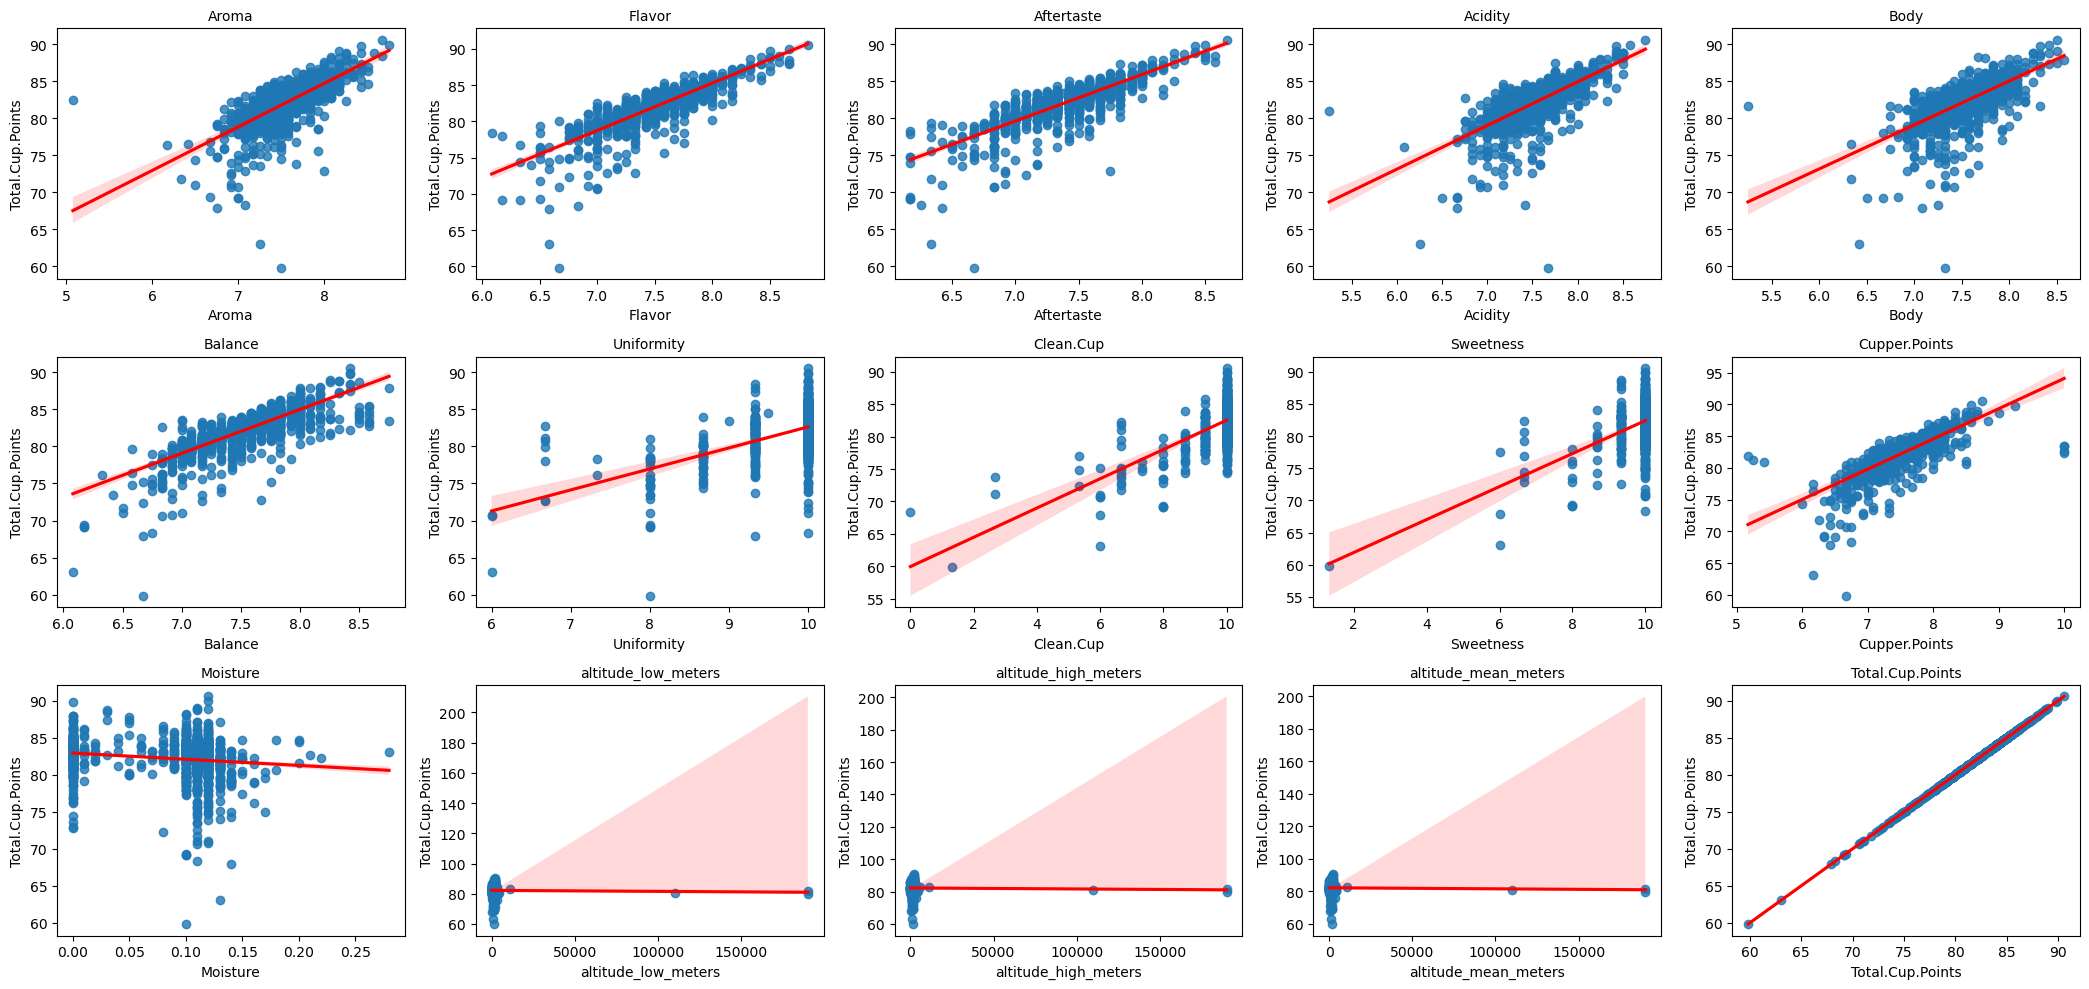

In [23]:
liste = new_data.select_dtypes(include=["float64", "int64"]).columns.tolist()

"""for col in liste : 
    sns.lmplot(x = col, y = "Total.Cup.Points", 
               data = new_data, line_kws={'color':'red'})
    plt.title(f"Relation entre {col} et score café")
    plt.show()"""

# 🔹 Boucle pour tracer les nuages de point entre la variable cible et chaque variable explicative

# 🔹 Création de la grille de sous-graphiques
fig, axs = plt.subplots(3, 5, figsize=(21, 10))
axs = axs.ravel()

# 🔹 Boucle pour tracer les nuages de points avec régression
for i, column in enumerate(liste):
    sns.regplot(x=column, y="Total.Cup.Points", data=new_data, ax=axs[i], line_kws={'color': 'red'})
    axs[i].set_title(column, fontsize=10)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Total.Cup.Points")

# 🔹 Supprimer les sous-graphiques vides s’il y en a
for j in range(len(liste), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [24]:
# Test pour vérifier si les variables suivent une loie normal
from scipy.stats import shapiro 
for col in liste: 
    stat, p = shapiro(new_data[col].dropna()) 
    print(f"{col} : p-value = {p:.4f}")

Aroma : p-value = 0.0000
Flavor : p-value = 0.0000
Aftertaste : p-value = 0.0000
Acidity : p-value = 0.0000
Body : p-value = 0.0000
Balance : p-value = 0.0000
Uniformity : p-value = 0.0000
Clean.Cup : p-value = 0.0000
Sweetness : p-value = 0.0000
Cupper.Points : p-value = 0.0000
Moisture : p-value = 0.0000
altitude_low_meters : p-value = 0.0000
altitude_high_meters : p-value = 0.0000
altitude_mean_meters : p-value = 0.0000
Total.Cup.Points : p-value = 0.0000


Nuage de points entre les variables explicatives et la variable cible

Ces graphiques présentent les relations entre chaque variable explicative et la variable cible Total.Cup.Points, représentant le score global de qualité du café.

1. Variables sensorielles (Aroma, Flavor, Aftertaste, Acidity, Body, Balance)

Les points sont globalement alignés autour de la droite de régression, ce qui traduit une relation positive et linéaire entre ces variables et le score final.
Autrement dit, plus les notes de ces caractéristiques sensorielles sont élevées, plus le score global du café augmente.
Cela indique que la qualité perçue du café dépend fortement de ces dimensions sensorielles.

2. Variables Uniformity, Clean.Cup et Sweetness

Les points sont bien regroupés, mais ils forment des lignes verticales, ce qui indique une faible variabilité dans les valeurs de ces variables (souvent proches de 10).
Il existe bien une relation positive avec le score global, mais elle n’est pas linéaire : ces variables semblent jouer un rôle important lorsque leur note baisse (valeurs plus rares et anormales), mais apportent peu de distinction quand elles sont proches du maximum.
En d’autres termes, ces critères sont presque parfaits dans la plupart des cafés, et ne discriminent pas vraiment les différences de qualité.

3. Variable Cupper.Points

Cette variable montre une forte relation linéaire positive avec la variable cible.
Cela est logique puisque le score attribué par l’expert (Cupper Points) influence directement le score final Total.Cup.Points.
Les deux mesures évoluent donc de manière proportionnelle.

4. Variable Moisture (taux d’humidité des grains)

On observe une relation négative non linéaire :
quand le taux d’humidité augmente, le score global du café tend à diminuer.
Cela signifie que les cafés trop humides sont associés à une qualité inférieure, probablement à cause de problèmes de conservation ou de développement aromatique.

5. Variables d’altitude (minimale, maximale et moyenne)

Les graphiques montrent une dispersion extrême des points et des valeurs anormalement élevées (supérieures à 100 000 mètres).
Ces observations ne sont pas cohérentes avec la réalité agronomique, car les plantations de café se situent généralement entre 500 et 2 000 mètres d’altitude.
Ces valeurs aberrantes traduisent donc des erreurs dans les données ou une mauvaise saisie (probablement dues à une confusion d’unités ou à un problème de conversion).
Il sera nécessaire de corriger ou exclure ces valeurs avant toute analyse ou modélisation.


---

🔹 En résumé

Les variables sensorielles montrent des relations positives claires avec la qualité du café,
tandis que certaines variables comme Uniformity, Clean.Cup et Sweetness présentent des valeurs trop concentrées pour révéler de vraies différences.
Les variables d’environnement, en particulier l’altitude, nécessitent un nettoyage des données avant d’être interprétées de manière fiable.

 ## Test statistique 

 Après avoir fait le test de normalité de shapiro wilk, aucune variable ne suit une loi normale. Par conséquent pour test la correlation entre les variables le test de pearson n'est pas approprié. Donc nous allons affectuer le test de Kendall vu la présence des valeurs extrêmes. 

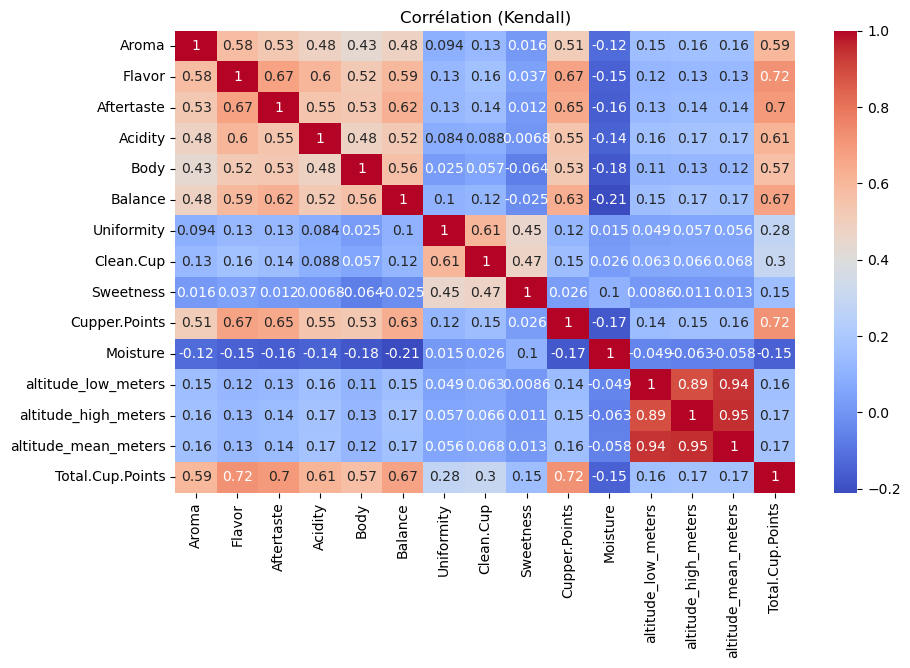

In [25]:
corr_matrix = new_data[liste].corr(method="kendall")
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Corrélation (Kendall)")
plt.show()

In [26]:
# Test et coef de correlation de kendall 
from scipy.stats import kendalltau
target = "Total.Cup.Points"
quantitative_cols = [col for col in new_data.select_dtypes(include=['float64', 'int64']).columns if col != target]

results = []

for col in quantitative_cols:
    corr, pval = kendalltau(new_data[target], new_data[col])
    results.append({"Variable": col, "Kendall_corr": corr, "p_value": pval})

# Résultats dans un DataFrame
spearman_results = pd.DataFrame(results)
print(spearman_results.sort_values(by="Kendall_corr", ascending=False))

                Variable  Kendall_corr        p_value
1                 Flavor      0.721000  6.225968e-307
9          Cupper.Points      0.717251  3.850392e-307
2             Aftertaste      0.696032  4.107081e-287
5                Balance      0.667939  1.404217e-264
3                Acidity      0.611149  6.857496e-221
0                  Aroma      0.593666  6.023147e-208
4                   Body      0.567481  1.442800e-189
7              Clean.Cup      0.297581   2.109324e-40
6             Uniformity      0.279489   3.949403e-36
8              Sweetness      0.153329   9.506046e-12
10              Moisture     -0.150877   7.249488e-14
11   altitude_low_meters           NaN            NaN
12  altitude_high_meters           NaN            NaN
13  altitude_mean_meters           NaN            NaN


Le test de correlation de Kendall confirme l'hypotèse selon laquelle il existe une relation entre les variables explicatives et la variable cible. C'est à dire ces variables sont capables d'expliquer le score café et contribue à sa composition. Les variables d'altitude n'affiche rien et cela doit être dû à l'incohérence de ses valeurs.

Les variables Uniformity, Sweetness et Clean Cup présentent une faible variabilité que ce soit pour le boxplot ou les nuages de point. Bien qu’elles soient corrélées positivement au score total, leur homogénéité suggère qu’elles n’apportent que peu d’information discriminante. Elles pourraient donc être retirées ou pondérées faiblement dans le modèle pour éviter un risque de surapprentissage.

In [27]:
# Extraction des variables ayant une corrélation supérieur à 0.6 avec la variable d'intérêt
corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["Total.Cup.Points"]) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieur à 0.6 avec la variable d'intérêt
print("variables ayant une corrélation inférieure à 0.6 avec la variable d'intérêt (Total.Cup.Points) : \n")
print(corr_vars)

variables ayant une corrélation inférieure à 0.6 avec la variable d'intérêt (Total.Cup.Points) : 

['Flavor', 'Aftertaste', 'Acidity', 'Balance', 'Cupper.Points', 'Total.Cup.Points']


In [28]:
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt
corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["Total.Cup.Points"]) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieur à 0.6 avec la variable d'intérêt
print("variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Total.Cup.Points) : \n")
print(corr_vars)

variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Total.Cup.Points) : 

[]


In [29]:
# Extraction des couples de variables ayant une correlation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns : 
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values :
        if pair != col : 
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 : \n")
for col, pairs in corr_pairs.items() :
    if len(pairs) > 0 :
        for pair in pairs :
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 : 

altitude_low_meters - altitude_high_meters
altitude_low_meters - altitude_mean_meters
altitude_high_meters - altitude_low_meters
altitude_high_meters - altitude_mean_meters
altitude_mean_meters - altitude_low_meters
altitude_mean_meters - altitude_high_meters


In [30]:
from scipy.stats import kruskal

# Cible
target = "Total.Cup.Points"

# Colonnes catégorielles
categorical_cols = [col for col in new_data.select_dtypes(include=['object', 'category']).columns]

results_kruskal = []

for col in categorical_cols:
    groups = [group[target].dropna().values for name, group in new_data.groupby(col)]
    
    # Vérifier qu’il y a au moins 2 groupes valides
    if len(groups) > 1:
        stat, pval = kruskal(*groups)
        results_kruskal.append({"Variable": col, "Kruskal_stat": stat, "p_value": pval})

# Résultats
kruskal_results = pd.DataFrame(results_kruskal)
print(kruskal_results.sort_values(by="p_value"))

            Variable  Kruskal_stat       p_value
0  Country.of.Origin    306.818183  3.615870e-45
1            Variety    139.169023  1.062528e-16
2  Processing.Method     10.518642  3.254117e-02


# <a id= "4"> VI. Nettoyage, traitement et préparation des données</a>

## 1) Nettoyage et traitement des données

En analysant de façon bref mon jeu de données, je trouve des incohérances un peu plus complexe. Des valeurs aberrantes qui s'étandent jusqu'à 0 pour les caractèritiques sensorielles d'un café, et une altitude qui se trouvent entre 1m et 190164. Ce qui semble impossible? Ce pendant je suis bien consciente qu'il peut y exister des valeurs extrêmes du fait que certains cafés peut avoir des caractèritiques sensorielles minim très minim ou trop elevé ou bien cultivé sur un altitude trop elevé. Remplacer directement ces valeurs par les bornes de l'IQR me semble comme detruire des informations. De ce fait je me suis juste faite à l'idée de remplacer ces valeurs qui me semblent impossible par NaN puis imputer avec la méthode KNN les valeurs manquantes. Un café ne peut pas être cultivé sans altitude.

In [31]:
# Supprimer toutes les lignes où Cupper.Points == 0
print(new_data[new_data["Cupper.Points"] == 0])

Empty DataFrame
Columns: [Country.of.Origin, Variety, Processing.Method, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean.Cup, Sweetness, Cupper.Points, Moisture, altitude_low_meters, altitude_high_meters, altitude_mean_meters, Total.Cup.Points]
Index: []


In [32]:
# Remplacer les valeurs de l'altitude qui sont inférieur à 300 et supérieur à 3500 par NaN

 

altitudes_cols = ["altitude_low_meters", "altitude_high_meters", "altitude_mean_meters"]

for col in altitudes_cols:
    new_data.loc[(new_data[col] < 300) | (new_data[col] > 2500), col] = np.nan


print(new_data[altitudes_cols].isna().sum())  

altitude_low_meters     286
altitude_high_meters    284
altitude_mean_meters    286
dtype: int64


In [33]:
# imputation des valeurs manquantes par la méthodes KNN 

# 1) Choix du nombre de voisin k que represente un individu 
# 1) Copie du dataset
dt = new_data.copy()

# 2) Tirage aléatoire de 5% des lignes parmi celles qui ne sont PAS manquantes
np.random.seed(50)
indices_disponibles = dt[dt['altitude_mean_meters'].notna()].index
n = int(0.10 * len(indices_disponibles))  # 5% des lignes disponibles
indices_a_supprimer = np.random.choice(indices_disponibles, size=n, replace=False)

# 3) Sauvegarde des vraies valeurs
true_values = dt.loc[indices_a_supprimer, 'altitude_mean_meters'].copy()

# 4) Suppression (mettre NaN)
dt.loc[indices_a_supprimer, 'altitude_mean_meters'] = np.nan

# 5) Boucle pour tester plusieurs k
errors = {}
for k in range(1, 10):
    imputer = KNNImputer(n_neighbors=k)
    imputed_array = imputer.fit_transform(dt.select_dtypes(include=[np.number]))

    imputed = pd.DataFrame(imputed_array, columns=dt.select_dtypes(include=[np.number]).columns)

    # Récupérer les valeurs imputées aux indices supprimés
    predicted_values = imputed.loc[indices_a_supprimer, 'altitude_mean_meters']

    # Calcul du MAE
    mae = mean_absolute_error(true_values, predicted_values)
    errors[k] = mae

# 6) Résultats
print("Erreurs MAE pour chaque k:", errors)

# 7) Trouver k optimal
k_optimal = min(errors, key=errors.get)
print(f"K optimal : {k_optimal}")

Erreurs MAE pour chaque k: {1: 3.3840156862745103, 2: 4.666815686274512, 3: 7.684039215686269, 4: 10.2333, 5: 10.143229803921567, 6: 10.188793464052294, 7: 9.82570532212885, 8: 9.505543137254902, 9: 9.50636252723311}
K optimal : 1


In [34]:
 # Réimputation avec le k optimal
imputer_final = KNNImputer(n_neighbors=k_optimal)
coffe_dt = dt.select_dtypes(include=[np.number])
coffe_imputed = imputer_final.fit_transform(coffe_dt)

# Mettre à jour les colonnes numériques imputées dans new_data
new_data[coffe_dt.columns] = coffe_imputed

In [35]:
new_data.isnull().sum()
 

Country.of.Origin         1
Variety                 201
Processing.Method       151
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Moisture                  0
altitude_low_meters       0
altitude_high_meters      0
altitude_mean_meters      0
Total.Cup.Points          0
dtype: int64

In [36]:
# Imputation des valeurs manquantes par  la mode 
from sklearn.impute import SimpleImputer
categorical_cols = [ "Variety", "Processing.Method", "Country.of.Origin"]
imputer_cat = SimpleImputer(strategy="most_frequent")
new_data[categorical_cols] = imputer_cat.fit_transform(new_data[categorical_cols])



In [37]:
# Renomer les modalité de la variable processing méthode
# Dictionnaire de renommage
processing_map = {
    "Washed / Wet": "Washed",
    "Natural / Dry": "Natural",
    "Semi-washed / Semi-pulped": "SemiWashed",
    "Other": "Other",
    "Pulped natural / honey": "Honey"
}

# Remplacement dans le dataset
new_data["Processing.Method"] = new_data["Processing.Method"].replace(processing_map)


## 2) Préparation des données

### a) Regroupement et encodage des variables catégorielle

In [38]:
import pandas as pd

# Exemple regroupement pays
def regrouper_pays(pays):
    if pays in ["Guatemala", "Costa Rica", "Honduras", "Nicaragua", "El Salvador", "Panama"]:
        return "Amérique_Centrale"
    elif pays in ["Colombia", "Brazil", "Peru", "Ecuador"]:
        return "Amérique_Sud"
    elif pays in ["Mexico", "United States", "United States (Hawaii)", "United States (Puerto Rico)", "Haiti"]:
        return "Amérique_Nord_Caraibes"
    elif pays in ["Ethiopia", "Tanzania, United Republic Of", "Uganda", "Kenya", "Burundi", "Rwanda", "Malawi", "Cote d?Ivoire"]:
        return "Afrique"
    elif pays in ["India", "Indonesia", "Vietnam", "China", "Myanmar", "Laos", "Thailand", "Philippines"]:
        return "Asie"
    else:
        return "Autres"

new_data["Pays_group"] = new_data["Country.of.Origin"].apply(regrouper_pays)

# Exemple pour les variétés
def regrouper_variety(var):
    if var in ["Typica", "Bourbon", "Caturra", "Catuai", "Pacas", "Pacamara"]:
        return "Classiques"
    elif var in ["Catimor", "Mundo Novo", "SL14", "SL28", "SL34", "Ruiru 11"]:
        return "Hybrides"
    elif var in ["Gesha", "Blue Mountain", "Hawaiian Kona", "Yellow Bourbon"]:
        return "Premium"
    else:
        return "Autres"

# Remplacement ds petites modalités de la variable processing méthode 
new_data['Processing.Method'] = new_data['Processing.Method'].replace({
    'Washed' : 'Lavee',
    'Natural' : 'Naturelle',
    'Honey': 'Autres',
    'SemiWashed': 'Autres',
    'Other' : 'Autres'
})

new_data["Variety_group"] = new_data["Variety"].apply(regrouper_variety)
cat_var = new_data[["Processing.Method", "Pays_group", "Variety_group"]]


In [39]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sélection des variables catégorielles
cat_var = new_data[["Processing.Method", "Pays_group", "Variety_group"]]

# Création et entraînement de l’encodeur
cat_encoder = OneHotEncoder(sparse_output=False, drop=None)
cat_encoded = cat_encoder.fit_transform(cat_var)

# Récupérer les noms originaux (catégories)
categories = cat_encoder.categories_

if isinstance(categories[0], str):
    categories = [categories]


# Construire les noms de colonnes en gardant seulement les modalités
new_columns = []
for cats in categories:
    # Remplacer les espaces et caractères spéciaux par des underscores
    clean_cats = [str(c).replace(" ", "_").replace("/", "_").replace("-", "_") for c in cats]
    new_columns.extend(clean_cats)

# Transformation en DataFrame avec noms simplifiés
cat_encoded_df = pd.DataFrame(cat_encoded, columns=new_columns, index=new_data.index)

# Ajout des variables numériques
final_df = pd.concat([new_data.drop(columns=["Processing.Method", "Pays_group", 
                                             "Variety_group", "Country.of.Origin", "Variety",
                                             "Cupper.Points","altitude_low_meters","altitude_high_meters", 
                                             "Aftertaste" ]), 
                      cat_encoded_df], axis=1)

final_df.head()


Aroma  Flavor  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
0   8.67    8.83     8.75  8.50     8.42        10.0       10.0       10.0   
1   8.75    8.67     8.58  8.42     8.42        10.0       10.0       10.0   
2   8.42    8.50     8.42  8.33     8.42        10.0       10.0       10.0   
3   8.17    8.58     8.42  8.50     8.25        10.0       10.0       10.0   
4   8.25    8.50     8.50  8.42     8.33        10.0       10.0       10.0   

   Moisture  altitude_mean_meters  Total.Cup.Points  Autres  Lavee  Naturelle  \
0      0.12                2075.0             90.58     0.0    1.0        0.0   
1      0.12                2075.0             89.92     0.0    1.0        0.0   
2      0.00                1700.0             89.75     0.0    1.0        0.0   
3      0.11                2000.0             89.00     0.0    0.0        1.0   
4      0.12                2075.0             88.83     0.0    1.0        0.0   

   Afrique  Amérique_Centrale  Amérique_Nord_Caraibes  Amérique_Sud  Asie  \
0      1.0                0.0                     0.0           0.0   0.0   
1      1.0                0.0                     0.0           0.0   0.0   
2      0.0                1.0                     0.0           0.0   0.0   
3      1.0                0.0                     0.0           0.0   0.0   
4      1.0                0.0                     0.0           0.0   0.0   

   Autres  Autres  Classiques  Hybrides  Premium  
0     0.0     0.0         1.0       0.0      0.0  
1     0.0     1.0         0.0       0.0      0.0  
2     0.0     0.0         1.0       0.0      0.0  
3     0.0     0.0         1.0       0.0      0.0  
4     0.0     1.0         0.0       0.0      0.0

In [40]:
colonnes = [ "Aroma","Flavor", "Acidity","Body","Balance", "Moisture", "altitude_mean_meters",
            "Total.Cup.Points", "Uniformity","Clean.Cup","Sweetness"
 ]

final_df = final_df[colonnes]

### b) Division en Train et en Test

In [41]:
# Diviser les données en ensemble d'apprentissage et de test
train, test = train_test_split(final_df, test_size=0.2, random_state=42)


Selection des futures sur la base train

In [42]:
# Résumé stat des variables
train.describe()

Aroma       Flavor      Acidity         Body      Balance  \
count  1048.000000  1048.000000  1048.000000  1048.000000  1048.000000   
mean      7.571326     7.529456     7.544609     7.522281     7.525926   
std       0.319182     0.346308     0.317585     0.298038     0.347912   
min       5.080000     6.080000     5.250000     5.250000     6.080000   
25%       7.420000     7.330000     7.330000     7.330000     7.330000   
50%       7.580000     7.580000     7.580000     7.500000     7.500000   
75%       7.750000     7.750000     7.750000     7.670000     7.750000   
max       8.750000     8.830000     8.750000     8.580000     8.750000   

          Moisture  altitude_mean_meters  Total.Cup.Points   Uniformity  \
count  1048.000000           1048.000000       1048.000000  1048.000000   
mean      0.088798           1350.561102         82.197910     9.836803   
std       0.048165            340.666433          2.691835     0.501360   
min       0.000000            300.000000         59.830000     6.000000   
25%       0.090000           1170.000000         81.170000    10.000000   
50%       0.110000           1350.000000         82.500000    10.000000   
75%       0.120000           1600.000000         83.670000    10.000000   
max       0.280000           2285.000000         90.580000    10.000000   

         Clean.Cup    Sweetness  
count  1048.000000  1048.000000  
mean      9.834513     9.915296  
std       0.742133     0.449624  
min       0.000000     1.330000  
25%      10.000000    10.000000  
50%      10.000000    10.000000  
75%      10.000000    10.000000  
max      10.000000    10.000000

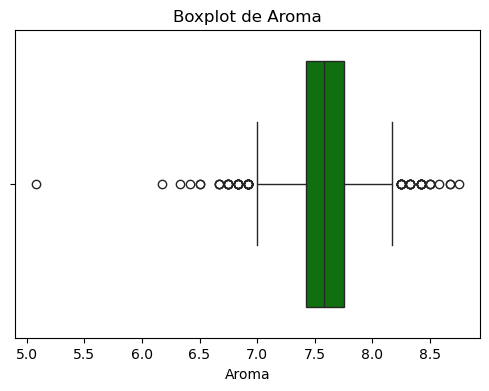

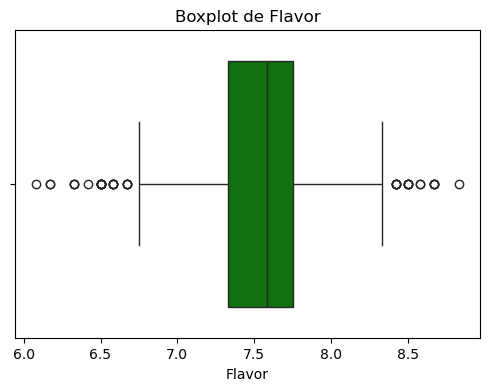

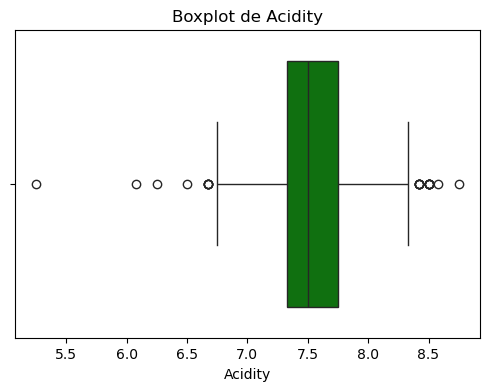

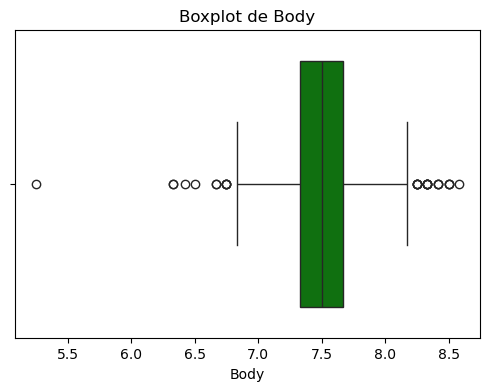

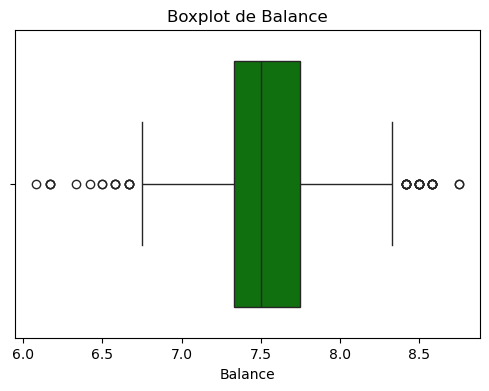

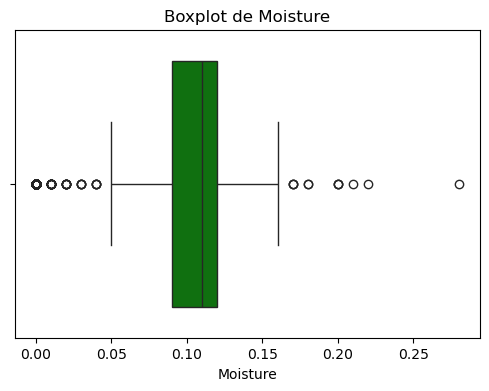

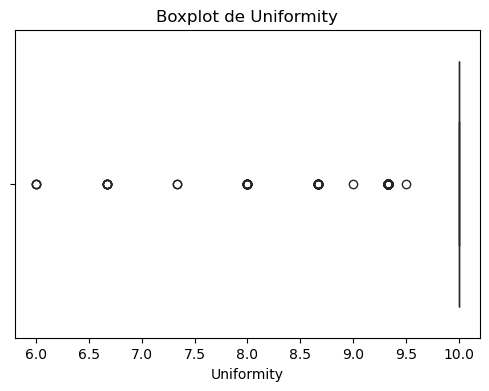

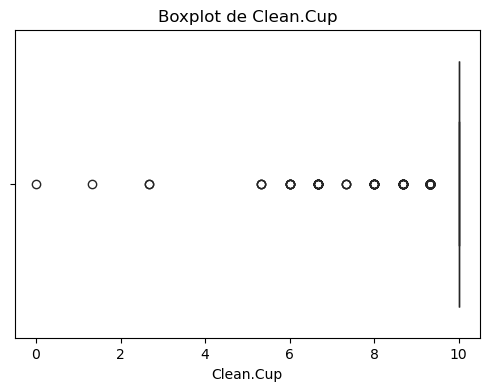

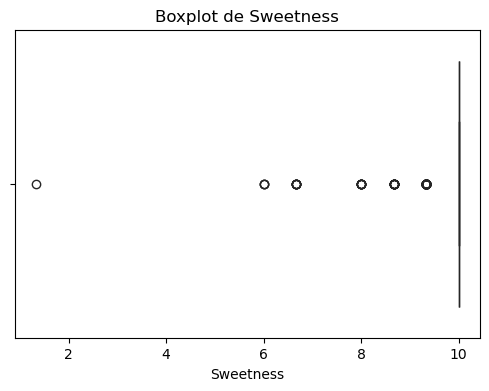

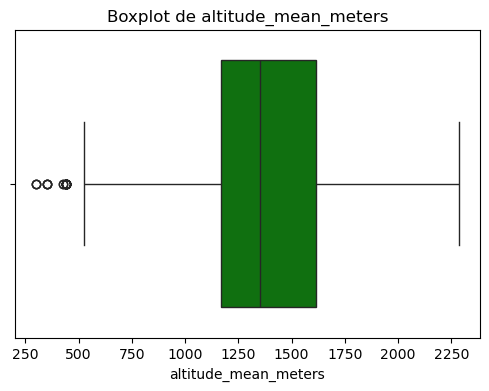

In [43]:
# Visualisation de la distribution des variables
# stochage des noms dans une liste 
var_list =  ["Aroma", "Flavor", "Acidity", "Body",
             "Balance", "Moisture", "Uniformity","Clean.Cup","Sweetness", "altitude_mean_meters" ]


# Boucle sur chaque variable numérique
for feature in var_list:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=new_data[feature], color="green")  # plus joli
    plt.title(f"Boxplot de {feature}")
    plt.show()

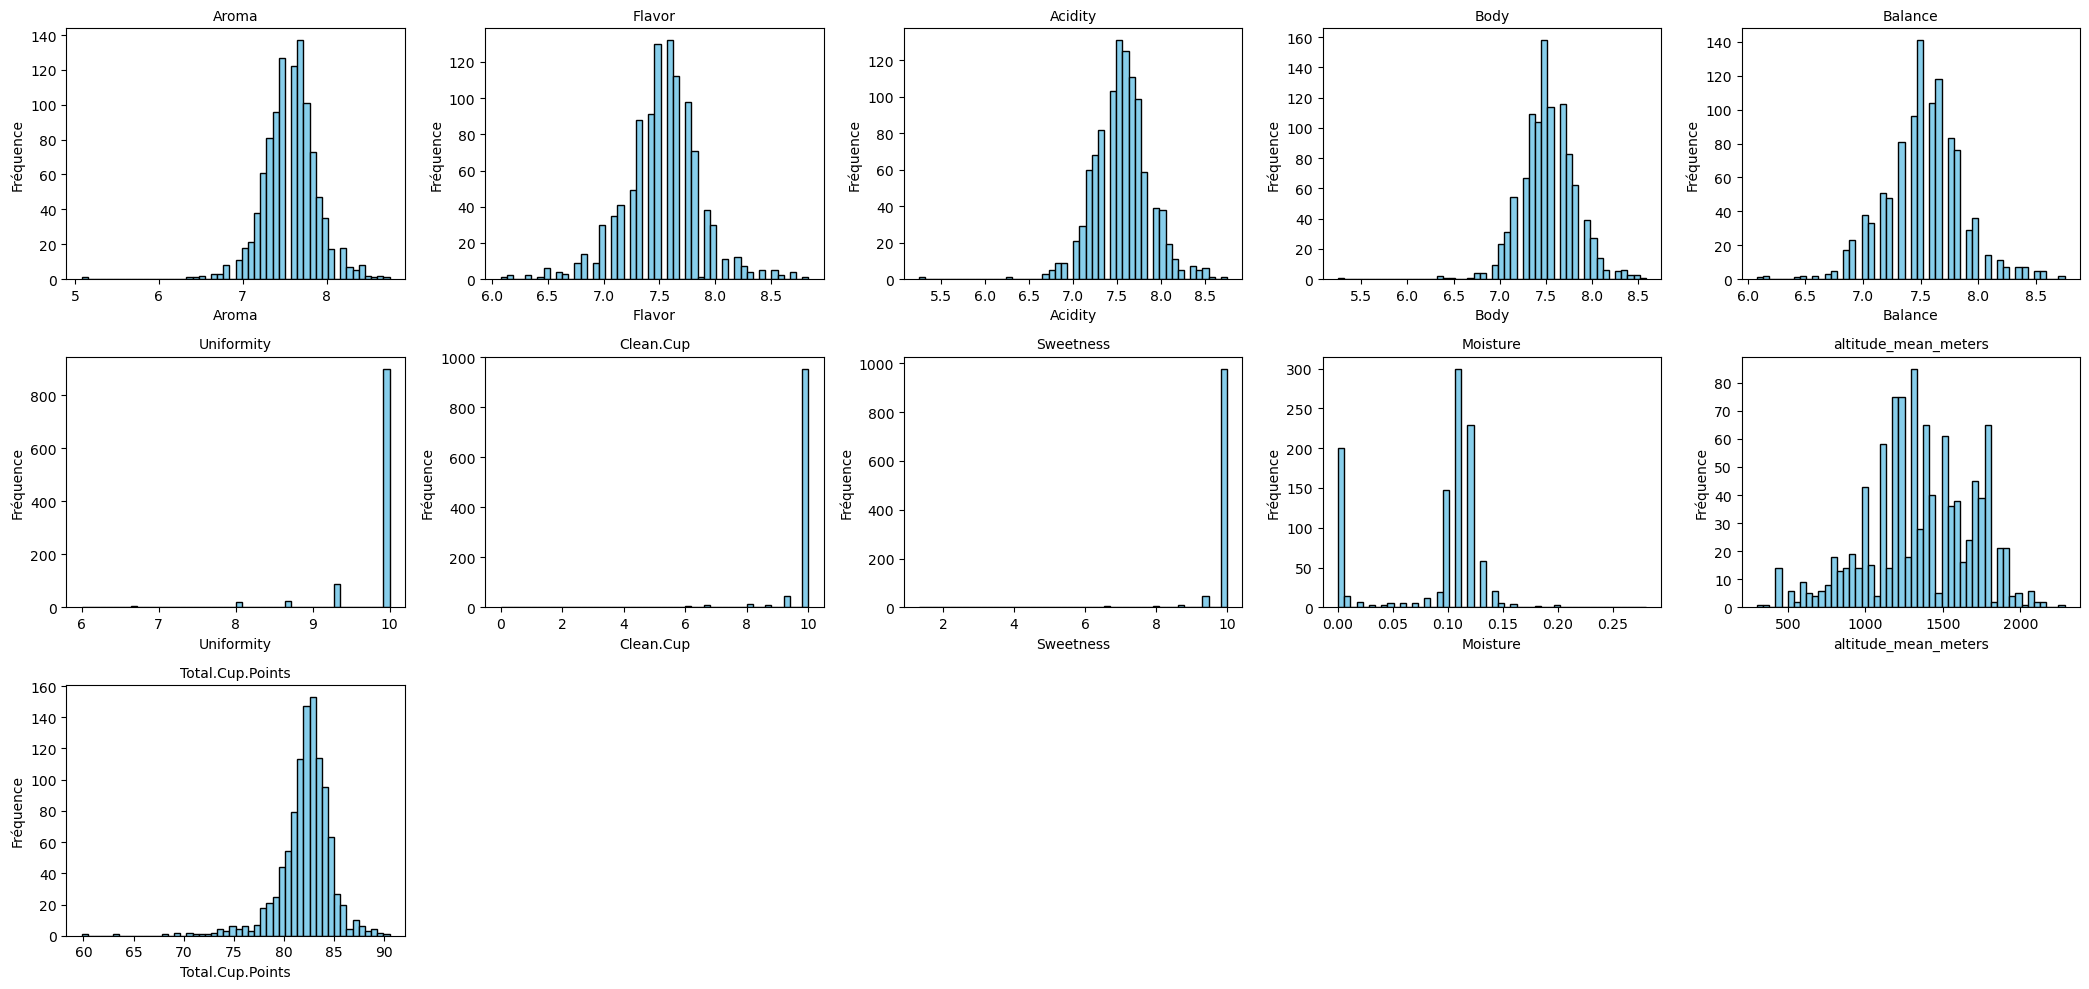

In [44]:
 # 🔹 Sélection manuelle des colonnes numériques
num_cols = ["Aroma", "Flavor", "Acidity", "Body",
             "Balance", "Uniformity","Clean.Cup","Sweetness",
              "Moisture","altitude_mean_meters", "Total.Cup.Points" 
]

# 🔹 Création de la grille de sous-graphiques
fig, axs = plt.subplots(3, 5, figsize=(21, 10))
axs = axs.ravel()

# 🔹 Boucle pour tracer les histogrammes

for i, column in enumerate(num_cols):
    axs[i].hist(train[column], bins=50, color="skyblue", edgecolor="black")
    axs[i].set_title(column, fontsize=10)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Fréquence")

# 🔹 Supprimer les sous-graphiques vides s’il y en a
for j in range(len(num_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()




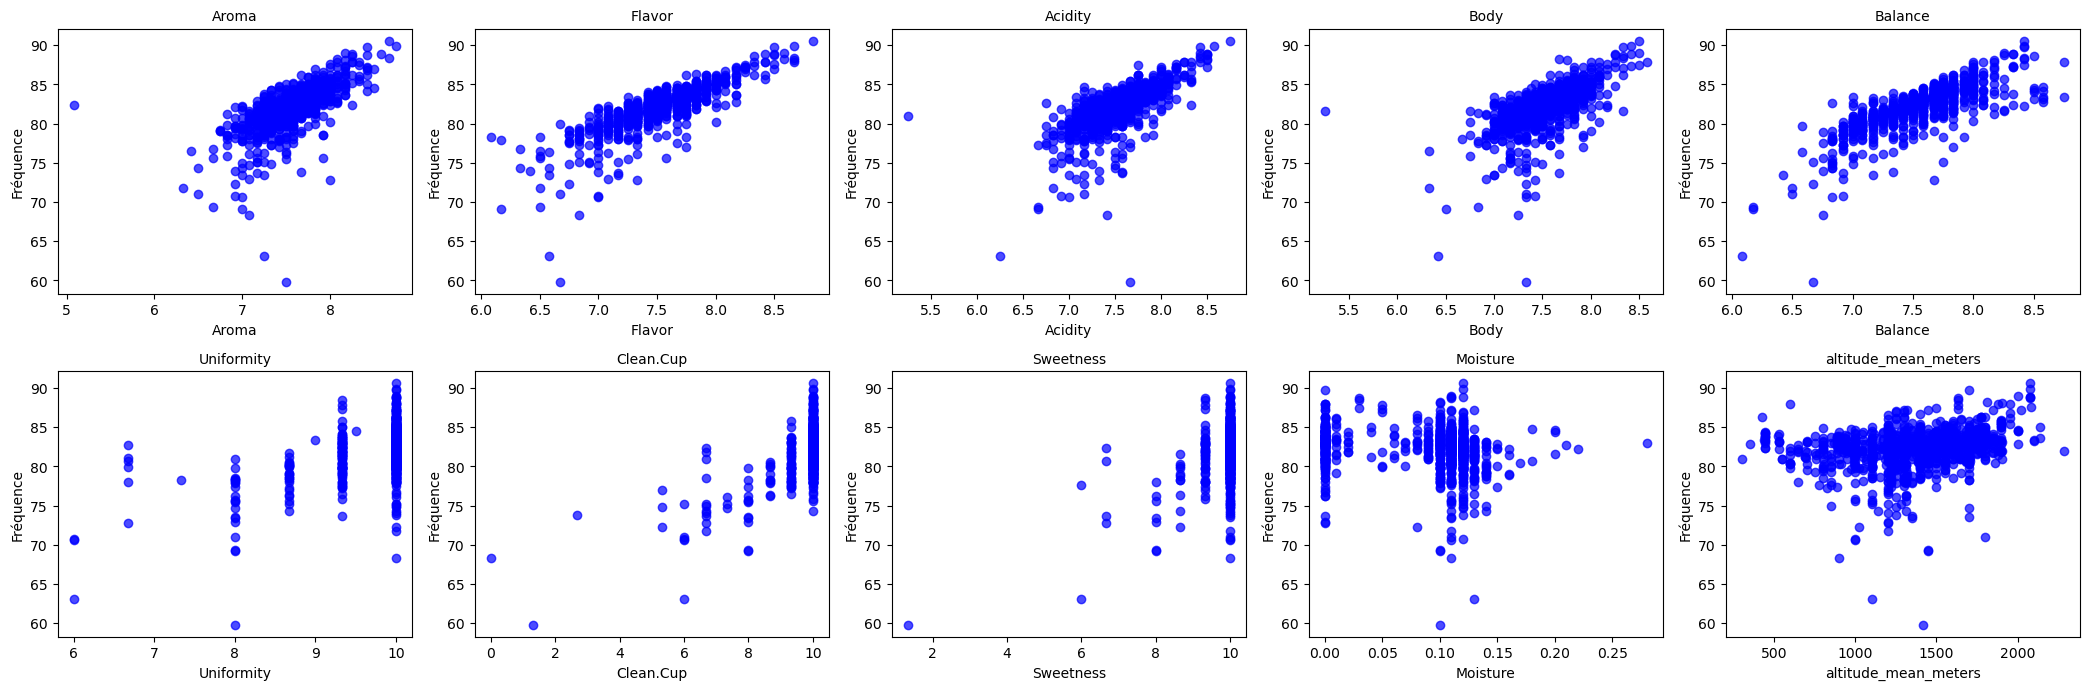

In [45]:
# Affichage des nuages de points entre la variable d'intérêt et toutes les autres variables
 

import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Liste manuelle des colonnes numériques (à adapter à ton jeu de données)
num_cols = ["Aroma", "Flavor", "Acidity", "Body",
             "Balance", "Uniformity","Clean.Cup","Sweetness",
              "Moisture","altitude_mean_meters" ]

# 🔹 Variable cible
target_col = "Total.Cup.Points"

# 🔹 Création de la grille de sous-graphiques
fig, axs = plt.subplots(3, 5, figsize=(21, 10))
axs = axs.ravel()

# 🔹 Boucle pour tracer les histogrammes

for i, column in enumerate(num_cols):
    axs[i].scatter(data=train, x=column, y=target_col, color="blue", alpha=0.7)
    axs[i].set_title(column, fontsize=10)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Fréquence")

# 🔹 Supprimer les sous-graphiques vides s’il y en a
for j in range(len(num_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [46]:
import pandas as pd

# Liste des variables numériques que tu veux garder
num_cols = [
    "Aroma", "Flavor", "Acidity", "Body",
    "Balance", "altitude_mean_meters", "Clean.Cup","Total.Cup.Points",  
    "Sweetness",  "Moisture", "Uniformity"
]

# Vérifie quelles colonnes existent réellement dans ton DataFrame
cols_existantes = [col for col in num_cols if col in train.columns]

# Crée un DataFrame avec seulement ces colonnes
train_num = train[cols_existantes].copy()

# Conversion forcée des colonnes en numérique (au cas où certaines soient en object)
train_num = train_num.apply(pd.to_numeric, errors="coerce")

"""# Affiche les premières lignes pour vérifier
print(df_num.head())

# Vérifie les types pour t'assurer que tout est bien numérique
print(df_num.dtypes)"""


"# Affiche les premières lignes pour vérifier\nprint(df_num.head())\n\n# Vérifie les types pour t'assurer que tout est bien numérique\nprint(df_num.dtypes)"

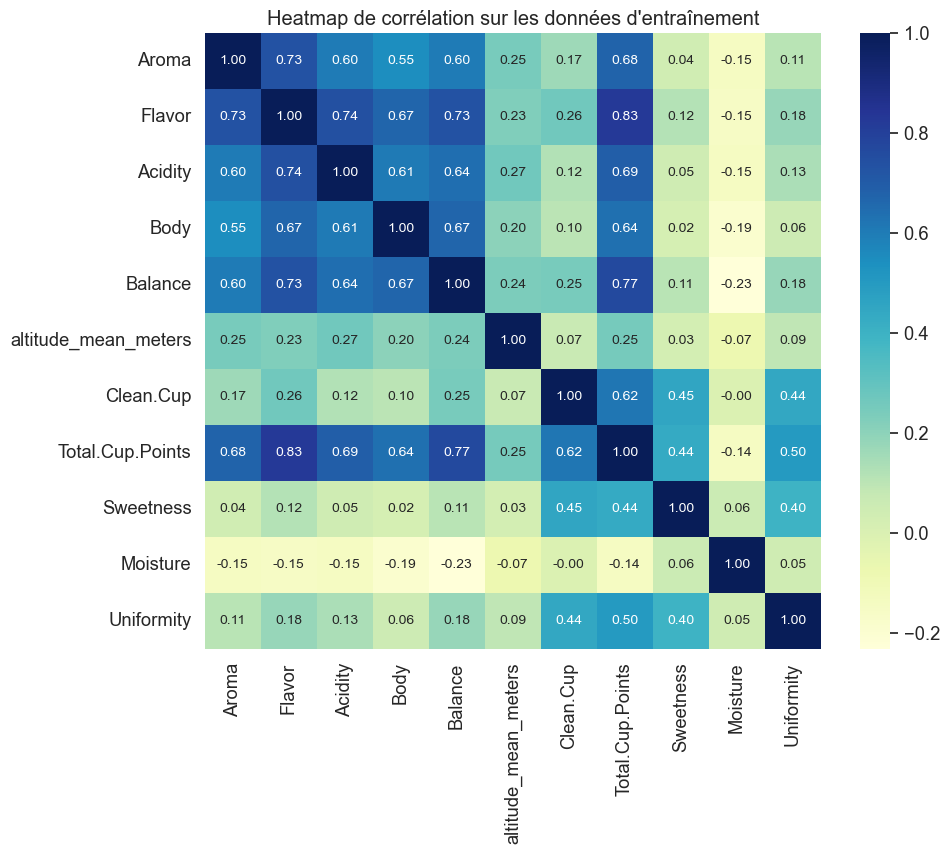

In [47]:
# Calcule de la correlation entre chaque variable et la variable cible (en valeur absolue)

corr_matrix_train = train_num.corr()

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, cmap = "YlGnBu", annot = True, annot_kws={"size" : 10}, square=True, fmt = ".2f")

# Affichage du graphique

plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()

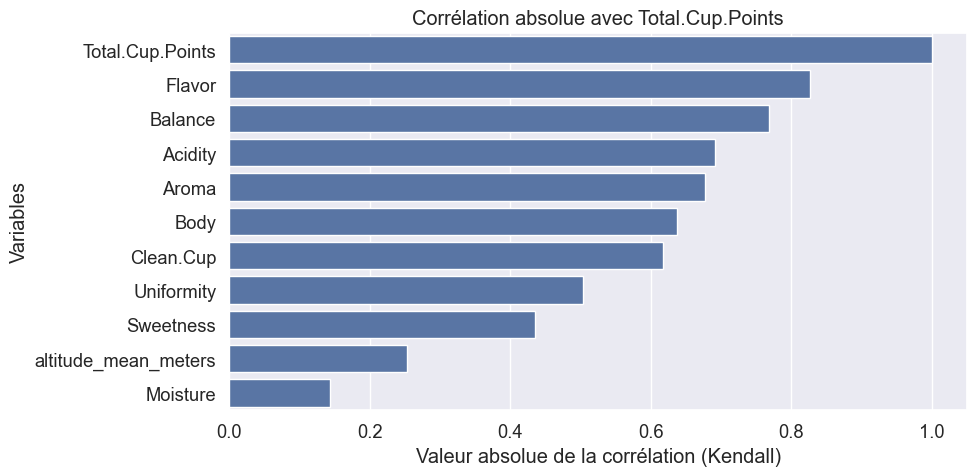

In [48]:
# Calcul de la corrélation entre chaque variable et la variable cible  en valeur absolue

import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des corrélations absolues avec la variable cible
correlations = abs(train_num.corr()["Total.Cup.Points"]).sort_values(ascending=False)


# Visualisation
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.values, y=correlations.index )
plt.title("Corrélation absolue avec Total.Cup.Points")
plt.xlabel("Valeur absolue de la corrélation (Kendall)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


# <a id= "5"> V. Modelisation</a>

In [49]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
from sklearn.metrics import r2_score, mean_squared_error


# séparation des variables prédictives et de la variable cible
X_train = train.drop("Total.Cup.Points", axis=1)
Y_train = train["Total.Cup.Points"]

X_test = test.drop("Total.Cup.Points", axis=1)
Y_test = test["Total.Cup.Points"]


# Standardisation
scaler = StandardScaler()

## 1) Modèle de régression linéaire

In [50]:
# On apprend les moyennes/écarts-types uniquement sur X_train
 
X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns, 
                              index=X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test), 
                             columns=X_test.columns, 
                             index=X_test.index)

In [ ]:
# Ajout explicite de la constante
X_train = sm.add_constant(X_train, has_constant="add")
X_test = sm.add_constant(X_test, has_constant="add")

# Entraînement du modèle
lr_modele = sm.OLS(Y_train, X_train).fit()

# Obtension du tableau des résultats
results_table = lr_modele.summary2().tables[1]
results_table 

Coef.  Std.Err.            t          P>|t|  \
const                 82.197910  0.010603  7752.199775   0.000000e+00   
Aroma                  0.368145  0.015915    23.131564   8.667456e-96   
Flavor                 0.717059  0.021175    33.862869  6.979099e-170   
Acidity                0.379861  0.016758    22.667552   1.019736e-92   
Body                   0.327873  0.015688    20.899277   3.206478e-81   
Balance                0.514843  0.017369    29.641702  2.319266e-140   
Moisture              -0.032151  0.010980    -2.928011   3.485935e-03   
altitude_mean_meters   0.023354  0.011115     2.101181   3.586595e-02   
Uniformity             0.504828  0.012323    40.966211  5.632204e-219   
Clean.Cup              0.780857  0.013002    60.057694   0.000000e+00   
Sweetness              0.439138  0.012314    35.661113  1.980942e-182   

                         [0.025     0.975]  
const                 82.177104  82.218716  
Aroma                  0.336916   0.399375  
Flavor                 0.675508   0.758611  
Acidity                0.346978   0.412745  
Body                   0.297089   0.358658  
Balance                0.480761   0.548925  
Moisture              -0.053697  -0.010604  
altitude_mean_meters   0.001544   0.045164  
Uniformity             0.480647   0.529009  
Clean.Cup              0.755344   0.806370  
Sweetness              0.414974   0.463301

In [52]:
lr_modele.summary2().tables[0]

0                 1                    2         3
0               Model:               OLS      Adj. R-squared:     0.984
1  Dependent Variable:  Total.Cup.Points                 AIC:  743.8207
2                Date:  2025-10-24 20:03                 BIC:  798.3217
3    No. Observations:              1048      Log-Likelihood:   -360.91
4            Df Model:                10         F-statistic:     6335.
5        Df Residuals:              1037  Prob (F-statistic):      0.00
6           R-squared:             0.984               Scale:   0.11782

In [53]:
# Obtention des prédictions et des métriques d'évaluation 
 

Y_train_pred = lr_modele.predict(sm.add_constant(X_train))
Y_test_pred = lr_modele.predict(sm.add_constant(X_test))
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [54]:
df_metrics = pd.DataFrame({
    'Métrique' : ['R2', 'MSE', 'RMSE'],
    'Train' : [r2_train, mse_train, rmse_train],
    'Test' : [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique     Train      Test
0       R2  0.983895  0.985297
1      MSE  0.116587  0.104137
2     RMSE  0.341448  0.322702


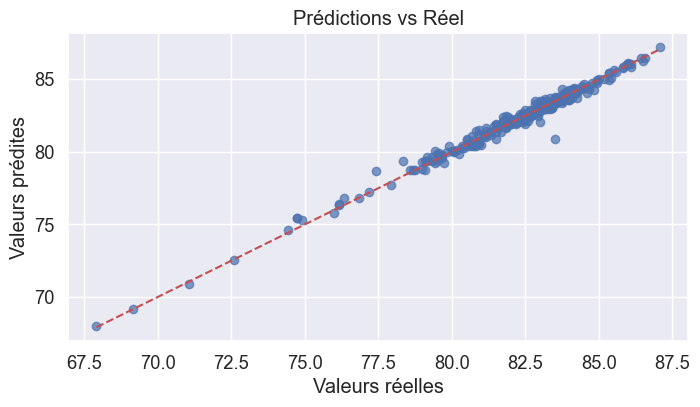

In [55]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8,4))
plt.scatter(Y_test, Y_test_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Réel")
plt.show()
 

### Vérification des hypothèses du modèle

a) Vérification de l'homoscedasticité

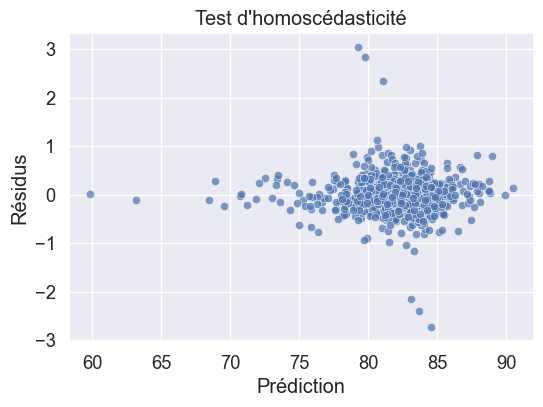

In [56]:
# Test d'homoscedasticité 
Y_train_pred = lr_modele.predict(sm.add_constant(X_train))
residuals = Y_train - Y_train_pred
plt.figure(figsize=(6, 4))
sns.scatterplot(x = Y_train_pred, y = residuals, alpha = 0.7)
plt.title("Test d\'homoscédasticité")
plt.xlabel('Prédiction')
plt.ylabel('Résidus')
plt.show() 

In [57]:
# Test de Breuschpagan 
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, lr_modele.model.exog)

labels = ['Lagrange multiplier statistic', 'p-values', 'f-values', 'f p-values']
bp_results = dict(zip(labels, bp_test))

print(bp_results)

{'Lagrange multiplier statistic': 5.8445254643515145, 'p-values': 0.8281519498059323, 'f-values': 0.5815612981578411, 'f p-values': 0.83001375360865}


b) Vérification de la multicolliniarité

In [58]:
# test de multicolliniarité 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Vif Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

    Vif Factor              features
0     1.000000                 const
1     2.252978                 Aroma
2     3.988330                Flavor
3     2.497866               Acidity
4     2.189162                  Body
5     2.683316               Balance
6     1.072414              Moisture
7     1.098804  altitude_mean_meters
8     1.350716            Uniformity
9     1.503605             Clean.Cup
10    1.348777             Sweetness


c) Test de normalité des résidus 

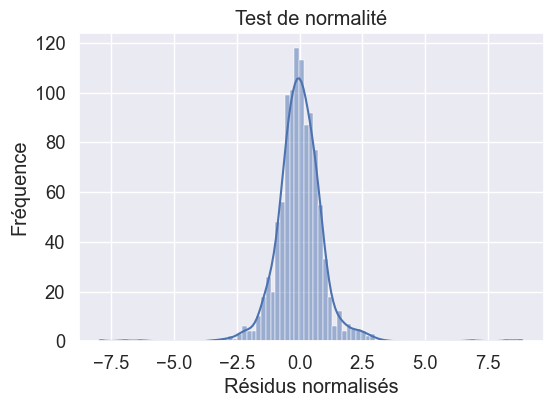

In [59]:
# Vérifcation de la normalité 
resid_norm = lr_modele.get_influence().resid_studentized_internal
plt.figure(figsize=(6, 4))
sns.histplot(resid_norm, kde = True)
plt.title("Test de normalité")
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show() 


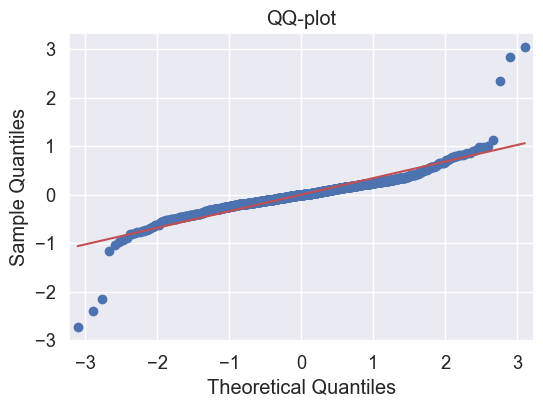

In [60]:
#QQ-plot
fig, ax = plt.subplots(figsize = (6, 4))
sm.qqplot(residuals, line = 's', ax = ax)
ax.set_title('QQ-plot')
plt.show()

In [61]:
import scipy.stats as stats 

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling 
anderson_test = stats.anderson(residuals, dist = 'norm')

# Test de Kolmongrov-Simirnov 
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
df_normality = pd.DataFrame({
    'Test de normalité' : ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogrov-Smirnov'],
    'Statitique' : [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-values': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
     
})

# Afficher le tableau 
print(df_normality)



   Test de normalité  Statitique p-values
0       Shapiro-Wilk    0.842952      0.0
1   Anderson-Darling   19.993859      N/A
2  Kolmogrov-Smirnov    0.288719      0.0


d) Vérification de l'autocorrélation

In [62]:
from statsmodels.stats.stattools import durbin_watson
# Test d'autocorrélation
dw_test = durbin_watson(lr_modele.resid)
print("Test de Durbin-Watson : statistique = %f" % dw_test)

Test de Durbin-Watson : statistique = 1.848909


e) Moyenne des termes d'erreur 

In [63]:
residuals.mean()

1.2163298358336066e-14

## 2) Modèle de régression Ridge et Lasso 

## A) La régression Ridge

In [64]:
from sklearn.linear_model import Lasso, LassoCV, RidgeCV, Ridge, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score

# Créer et ajuster le modèle RidgeCV 
alphas = np.linspace(0.01, 1, 100)                # Liste des valeurs possible pour le paramètre alpha
ridge_cv = RidgeCV(alphas=alphas, cv = 7)       # Le nombre de folds pour la validation croisée
ridge_cv.fit(X_train, Y_train)

# Obtenir le meuilleur paramètre alpha 
best_alpha = ridge_cv.alpha_
print(f"Best alpha : {best_alpha}" )

Best alpha : 1.0


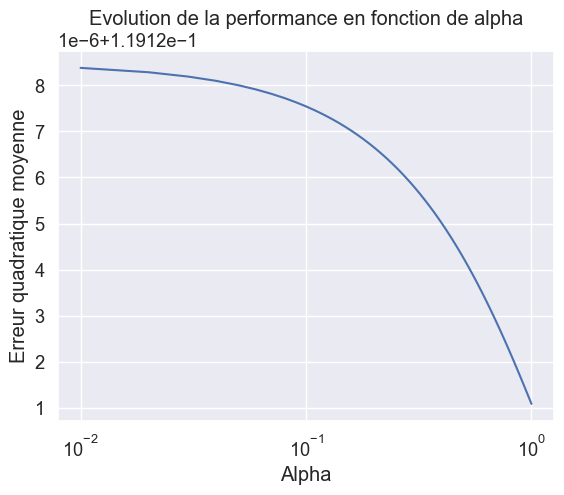

In [65]:
mse_scores = []
for alpha in alphas :
    model = Ridge(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv = 5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

## B) La régression Lasso

In [66]:
# Créer et optimiser le modèle Lasso 

alphas = [0.01, 1.0, 10, 100]
lasso_cv = LassoCV(alphas=alphas, cv = 5)
lasso_cv.fit(X_train, Y_train)

# Obtenir le meilleur paramètre alpha 
best_alpha = lasso_cv.alpha_
print(f"Best alpha : {best_alpha}")

Best alpha : 0.01


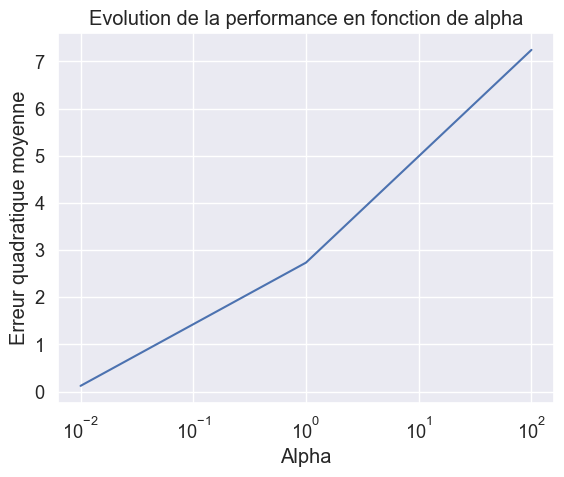

In [67]:
# Tracer le graphique d'évolution des performanes en fonction de alpha
alphas = [0.01, 1, 100]    # Liste des valeurs possibles pour le paramètre alpha
mse_scores = []
for alpha in alphas :
    model = Lasso(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv = 5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

In [68]:
# création des modèles 
ridge_model = RidgeCV(alphas = np.logspace(-5, 5, 11), cv = 5)
lasso_model = LassoCV(alphas = np.logspace(-5, 5, 11), cv = 5)

# Ajuster les modèles
ridge_model.fit(X_train, Y_train)
lasso_model.fit(X_train, Y_train)

# Prédire les modèles
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test) 
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test) 

## 3) Calcule et comparaison des métriques des trois modèles

In [69]:
# Calcule des métriques

# Ridge
r2_train_ridge = r2_score(Y_train, ridge_train_pred)
r2_test_ridge = r2_score(Y_test, ridge_test_pred)

mse_train_ridge = mean_squared_error(Y_train, ridge_train_pred)
mse_test_ridge = mean_squared_error(Y_test, ridge_test_pred)

rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

# Lasso
r2_train_lasso = r2_score(Y_train, lasso_train_pred)
r2_test_lasso = r2_score(Y_test, lasso_test_pred)

mse_train_lasso = mean_squared_error(Y_train, lasso_train_pred)
mse_test_lasso = mean_squared_error(Y_test, lasso_test_pred)

rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

In [70]:
df_metrics =  { 'Modèle' : ['Regression linéaire', 'Ridge', 'Lasso'],
    'R2 sur base train' : [r2_train, r2_train_ridge, r2_train_lasso],
    'R2 sur base test' : [r2_test, r2_test_ridge, r2_test_lasso],
    'RMSE sur la base train' : [rmse_train, rmse_train_ridge, rmse_train_lasso],
    'RMSE sur la base test' : [rmse_test, rmse_test_ridge, rmse_test_lasso]
}

df_metrics = pd.DataFrame(df_metrics)
print(df_metrics)  

                Modèle  R2 sur base train  R2 sur base test  \
0  Regression linéaire           0.983895          0.985297   
1                Ridge           0.983895          0.985293   
2                Lasso           0.983895          0.985297   

   RMSE sur la base train  RMSE sur la base test  
0                0.341448               0.322702  
1                0.341450               0.322747  
2                0.341448               0.322702  


# <a id= "6"> VI. Conclusion</a>